In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pubchempy as pcp
import re
from collections import defaultdict

# Load data
df = pd.read_csv("/home/tvanhout/oxides_ML/data/VASP_dataset.csv")

# Adding metadata

In [20]:

# Function to get molecular formula from PubChem
def get_molecular_formula(molecule_name):
    try:
        compound = pcp.get_compounds(molecule_name, 'name')
        if compound:
            return compound[0].molecular_formula  # Retrieve molecular formula
    except:
        return None  # Return None if PubChem lookup fails

# Function to count elements from molecular formula
def count_elements(formula):
    element_counts = defaultdict(int)
    
    if formula:
        # Regex to find elements and their counts (e.g., C2, H6, O)
        matches = re.findall(r'([A-Z][a-z]*)(\d*)', formula)
        
        for element, count in matches:
            element_counts[element] = int(count) if count else 1  # Default count to 1 if missing
    
    return element_counts

# Retrieve molecular formulas
df['Formula'] = df['Molecule'].apply(get_molecular_formula)

# Extract counts of elements (C, S, N, H, O)
for element in ['C', 'S', 'N', 'H', 'O']:
    df['Number of ' + element] = df['Formula'].apply(lambda x: count_elements(x).get(element, 0))


# Dataset info

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              601 non-null    object 
 1   Molecule Group       601 non-null    object 
 2   Molecule             601 non-null    object 
 3   Initial Site         601 non-null    object 
 4   DFT Energy (System)  601 non-null    float64
 5   DFT Energy (Slab)    601 non-null    float64
 6   DFT Energy (Gas)     601 non-null    float64
 7   Adsorption Energy    601 non-null    float64
 8   Formula              601 non-null    object 
 9   Number of C          601 non-null    int64  
 10  Number of S          601 non-null    int64  
 11  Number of N          601 non-null    int64  
 12  Number of H          601 non-null    int64  
 13  Number of O          601 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 65.9+ KB


In [22]:
molecule_groups = df['Molecule Group'].unique()
molecules = df['Molecule'].unique()
surfaces = df['Surface'].unique()

print("Dataset contains ",len(df)," entries of", len(molecules), "different molecules from", len(molecule_groups), "molecule groups adsorpbed on", len(surfaces), "surfaces.")

Dataset contains  601  entries of 38 different molecules from 10 molecule groups adsorpbed on 2 surfaces.


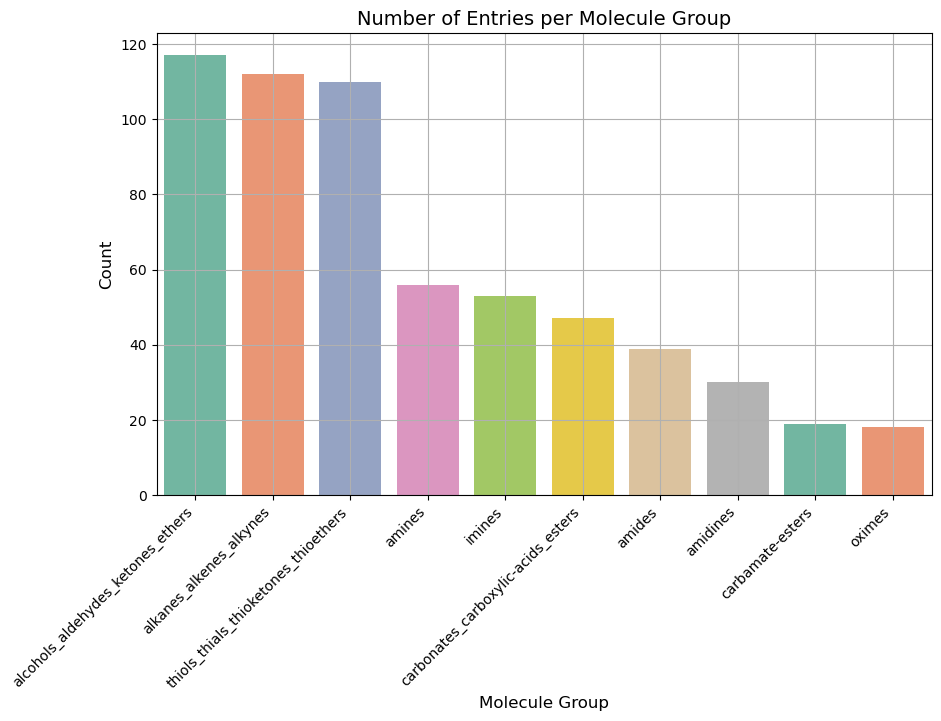

In [23]:
group_counts = df['Molecule Group'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="Set2", legend=False)

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of Entries per Molecule Group", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

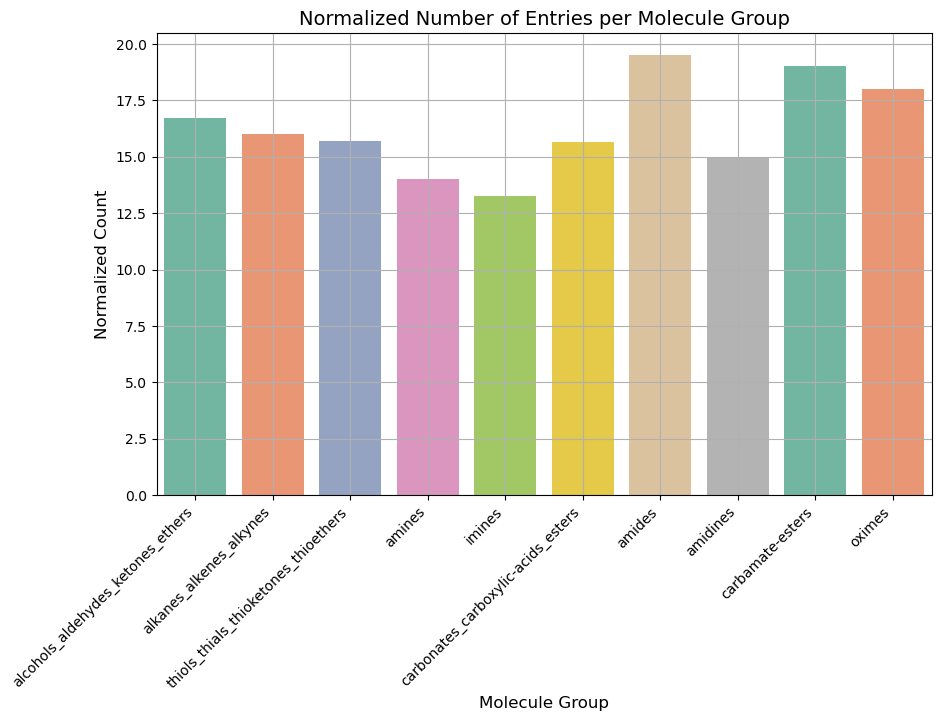

In [24]:
group_counts = df['Molecule Group'].value_counts().reset_index()
group_counts.columns = ["Molecule Group", "Count"]

molecule_counts = df.groupby("Molecule Group")["Molecule"].nunique().reset_index()
molecule_counts.columns = ["Molecule Group", "Total Molecules"]

group_counts = group_counts.merge(molecule_counts, on="Molecule Group")
group_counts["Normalized Count"] = group_counts["Count"] / group_counts["Total Molecules"]

plt.figure(figsize=(10, 6))
sns.barplot(x="Molecule Group", y="Normalized Count", data=group_counts, hue="Molecule Group", palette="Set2", legend=False)

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Normalized Count", fontsize=12)
plt.title("Normalized Number of Entries per Molecule Group", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()


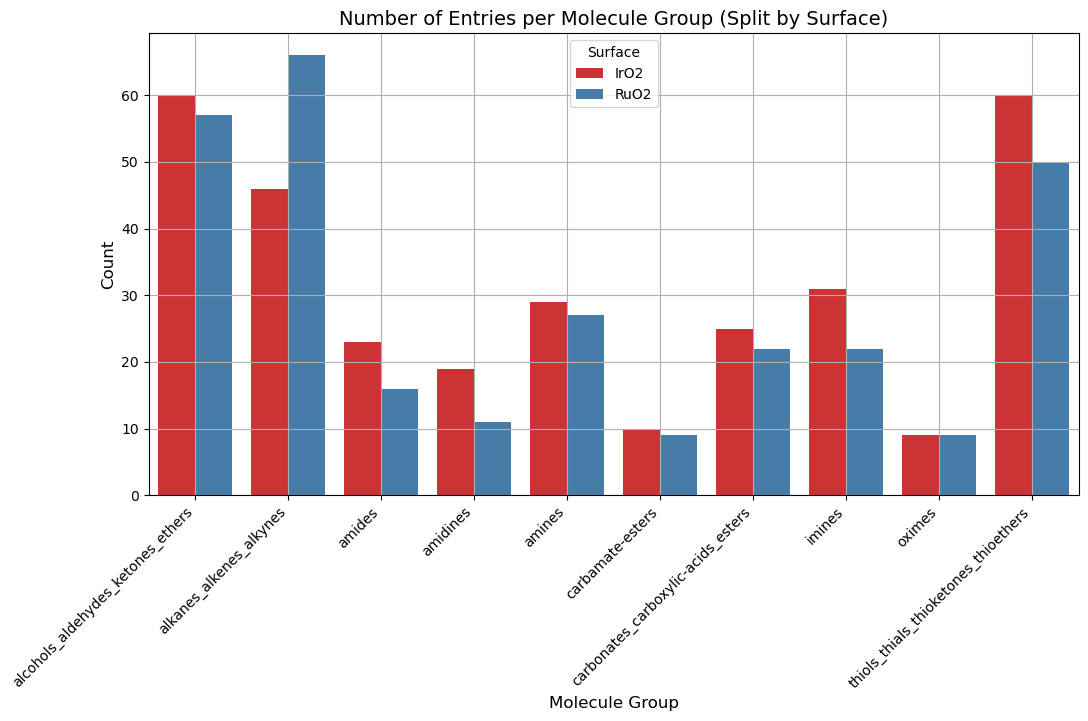

In [25]:
group_surface_counts = df.groupby(['Molecule Group', 'Surface']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x="Molecule Group", y="Count", hue="Surface", data=group_surface_counts, palette="Set1")

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of Entries per Molecule Group (Split by Surface)", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.legend(title="Surface")

plt.show()

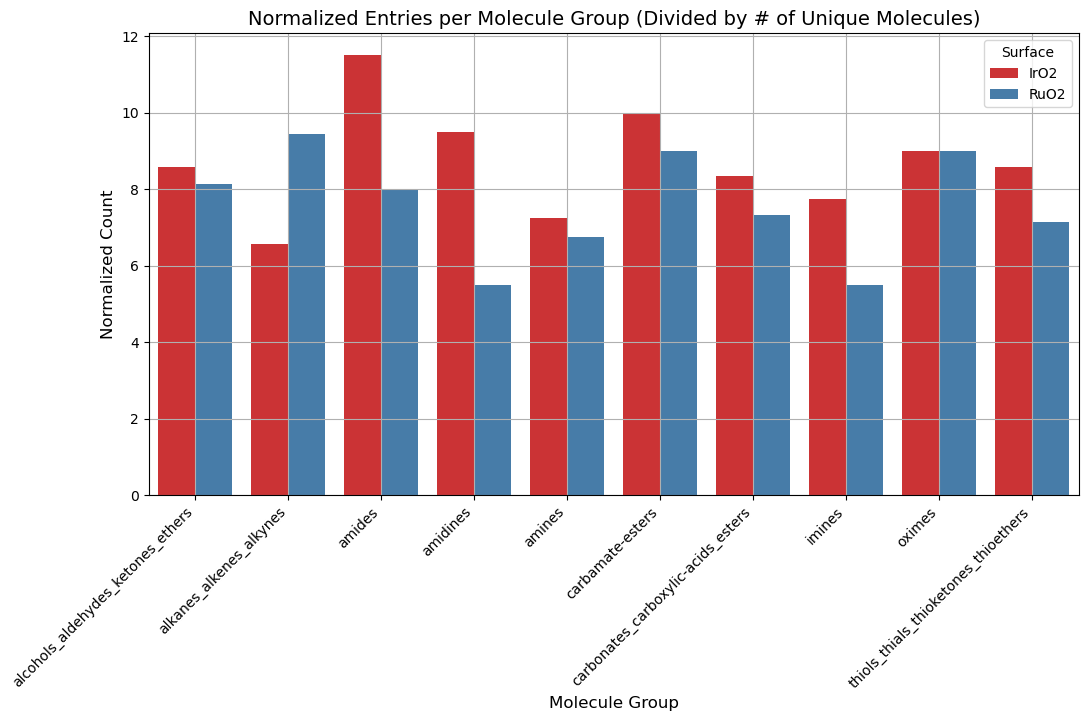

In [26]:
group_surface_counts = df.groupby(['Molecule Group', 'Surface']).size().reset_index(name='Count')

molecule_counts = df.groupby("Molecule Group")["Molecule"].nunique().reset_index(name="Total Molecules")

group_surface_counts = group_surface_counts.merge(molecule_counts, on="Molecule Group")
group_surface_counts["Normalized Count"] = group_surface_counts["Count"] / group_surface_counts["Total Molecules"]

plt.figure(figsize=(12, 6))
sns.barplot(x="Molecule Group", y="Normalized Count", hue="Surface", data=group_surface_counts, palette="Set1")

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Normalized Count", fontsize=12)
plt.title("Normalized Entries per Molecule Group (Divided by # of Unique Molecules)", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.legend(title="Surface")

plt.show()


In [27]:
df_RuO2 = df[df['Surface'] == 'RuO2']
df_RuO2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 288
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              289 non-null    object 
 1   Molecule Group       289 non-null    object 
 2   Molecule             289 non-null    object 
 3   Initial Site         289 non-null    object 
 4   DFT Energy (System)  289 non-null    float64
 5   DFT Energy (Slab)    289 non-null    float64
 6   DFT Energy (Gas)     289 non-null    float64
 7   Adsorption Energy    289 non-null    float64
 8   Formula              289 non-null    object 
 9   Number of C          289 non-null    int64  
 10  Number of S          289 non-null    int64  
 11  Number of N          289 non-null    int64  
 12  Number of H          289 non-null    int64  
 13  Number of O          289 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 33.9+ KB


In [28]:
df_IrO2 = df[df['Surface'] == 'IrO2']
df_IrO2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 289 to 600
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              312 non-null    object 
 1   Molecule Group       312 non-null    object 
 2   Molecule             312 non-null    object 
 3   Initial Site         312 non-null    object 
 4   DFT Energy (System)  312 non-null    float64
 5   DFT Energy (Slab)    312 non-null    float64
 6   DFT Energy (Gas)     312 non-null    float64
 7   Adsorption Energy    312 non-null    float64
 8   Formula              312 non-null    object 
 9   Number of C          312 non-null    int64  
 10  Number of S          312 non-null    int64  
 11  Number of N          312 non-null    int64  
 12  Number of H          312 non-null    int64  
 13  Number of O          312 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 36.6+ KB


# Removing duplicates

In [53]:
# Tolerance for considering two adsorption energies as duplicates
tolerance = 0.01

df_sorted = df.sort_values(by=['Molecule', 'Surface', 'Adsorption Energy'])
df_sorted['Energy_Diff'] = df_sorted.groupby(['Molecule', 'Surface'])['Adsorption Energy'].diff()
df_filtered = df_sorted[(df_sorted['Energy_Diff'].isna()) | (df_sorted['Energy_Diff'].abs() > tolerance)]

df_filtered = df_filtered.drop(columns=['Energy_Diff']).reset_index(drop=True)

# Drop two molecules for now:
molecules_to_drop = ['Propan-2-amine', 'Propane-2-thiol']

indexes_to_drop = df_filtered[df_filtered['Molecule'].isin(molecules_to_drop)].index

df_filtered = df_filtered.drop(indexes_to_drop)

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 0 to 478
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              449 non-null    object 
 1   Molecule Group       449 non-null    object 
 2   Molecule             449 non-null    object 
 3   Initial Site         449 non-null    object 
 4   DFT Energy (System)  449 non-null    float64
 5   DFT Energy (Slab)    449 non-null    float64
 6   DFT Energy (Gas)     449 non-null    float64
 7   Adsorption Energy    449 non-null    float64
 8   Formula              449 non-null    object 
 9   Number of C          449 non-null    int64  
 10  Number of S          449 non-null    int64  
 11  Number of N          449 non-null    int64  
 12  Number of H          449 non-null    int64  
 13  Number of O          449 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 52.6+ KB


In [54]:
molecule_groups = df_filtered['Molecule Group'].unique()
molecules = df_filtered['Molecule'].unique()
surfaces = df_filtered['Surface'].unique()

print("Dataset contains ",len(df_filtered)," entries of", len(molecules), "different molecules from", len(molecule_groups), "molecule groups adsorpbed on", len(surfaces), "surfaces.")

Dataset contains  449  entries of 36 different molecules from 10 molecule groups adsorpbed on 2 surfaces.


In [55]:
df_RuO2 = df_filtered[df_filtered['Surface'] == 'RuO2'].sort_values(by=['Molecule Group', 'Number of C']).reset_index(drop=True)
df_RuO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              219 non-null    object 
 1   Molecule Group       219 non-null    object 
 2   Molecule             219 non-null    object 
 3   Initial Site         219 non-null    object 
 4   DFT Energy (System)  219 non-null    float64
 5   DFT Energy (Slab)    219 non-null    float64
 6   DFT Energy (Gas)     219 non-null    float64
 7   Adsorption Energy    219 non-null    float64
 8   Formula              219 non-null    object 
 9   Number of C          219 non-null    int64  
 10  Number of S          219 non-null    int64  
 11  Number of N          219 non-null    int64  
 12  Number of H          219 non-null    int64  
 13  Number of O          219 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 24.1+ KB


In [56]:
df_IrO2 = df_filtered[df_filtered['Surface'] == 'IrO2'].sort_values(by=['Molecule Group','Number of C']).reset_index(drop=True)
df_IrO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              230 non-null    object 
 1   Molecule Group       230 non-null    object 
 2   Molecule             230 non-null    object 
 3   Initial Site         230 non-null    object 
 4   DFT Energy (System)  230 non-null    float64
 5   DFT Energy (Slab)    230 non-null    float64
 6   DFT Energy (Gas)     230 non-null    float64
 7   Adsorption Energy    230 non-null    float64
 8   Formula              230 non-null    object 
 9   Number of C          230 non-null    int64  
 10  Number of S          230 non-null    int64  
 11  Number of N          230 non-null    int64  
 12  Number of H          230 non-null    int64  
 13  Number of O          230 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 25.3+ KB


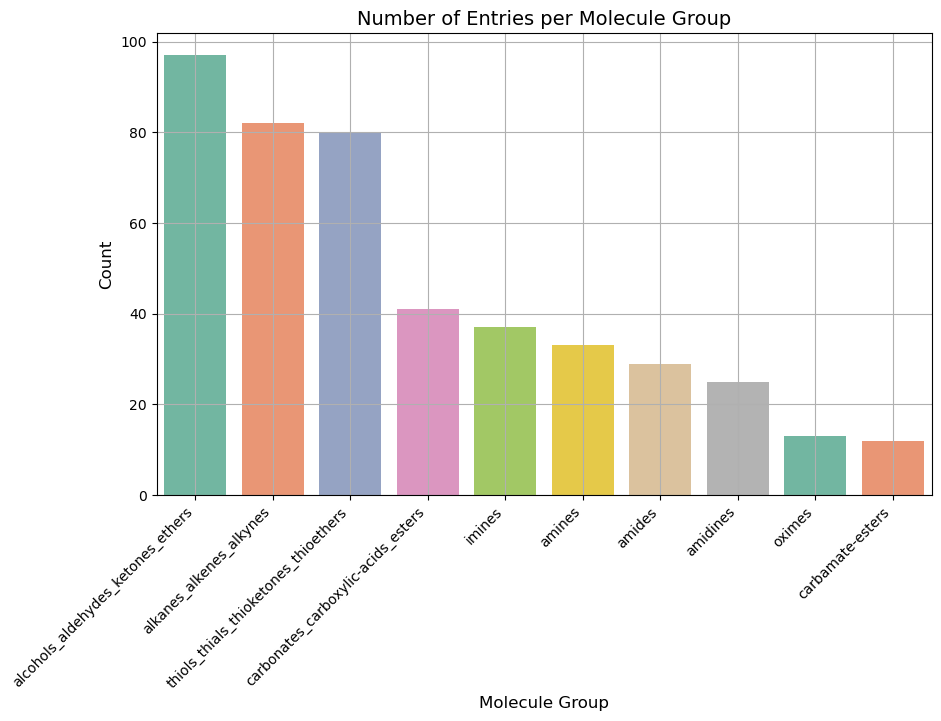

In [57]:
group_counts = df_filtered['Molecule Group'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="Set2", legend=False)

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of Entries per Molecule Group", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

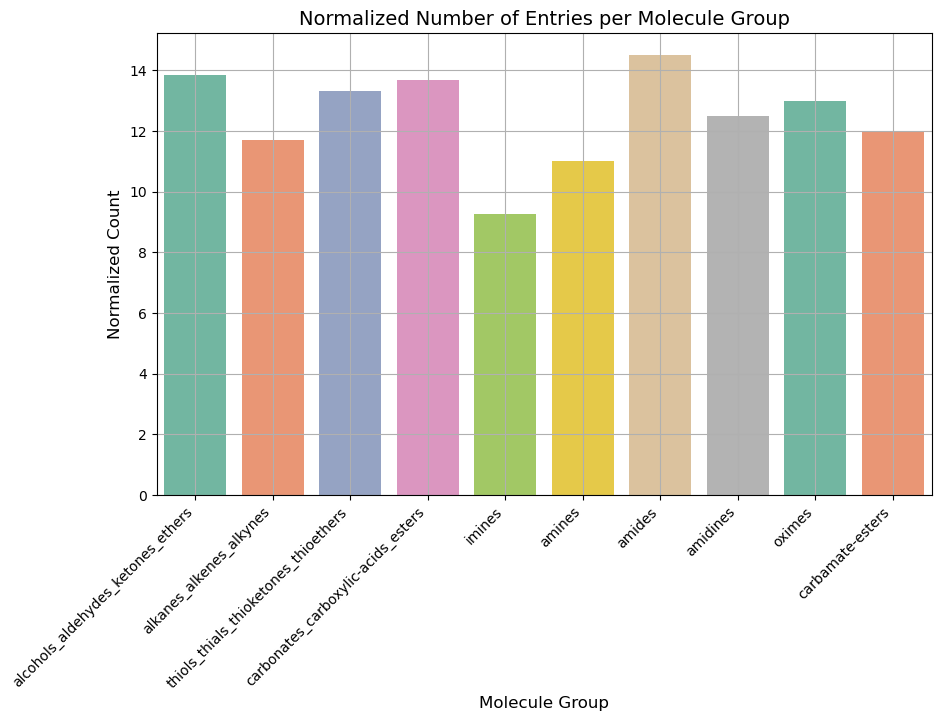

In [58]:
group_counts = df_filtered['Molecule Group'].value_counts().reset_index()
group_counts.columns = ["Molecule Group", "Count"]

molecule_counts = df_filtered.groupby("Molecule Group")["Molecule"].nunique().reset_index()
molecule_counts.columns = ["Molecule Group", "Total Molecules"]

group_counts = group_counts.merge(molecule_counts, on="Molecule Group")
group_counts["Normalized Count"] = group_counts["Count"] / group_counts["Total Molecules"]

plt.figure(figsize=(10, 6))
sns.barplot(x="Molecule Group", y="Normalized Count", data=group_counts, hue="Molecule Group", palette="Set2", legend=False)

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Normalized Count", fontsize=12)
plt.title("Normalized Number of Entries per Molecule Group", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

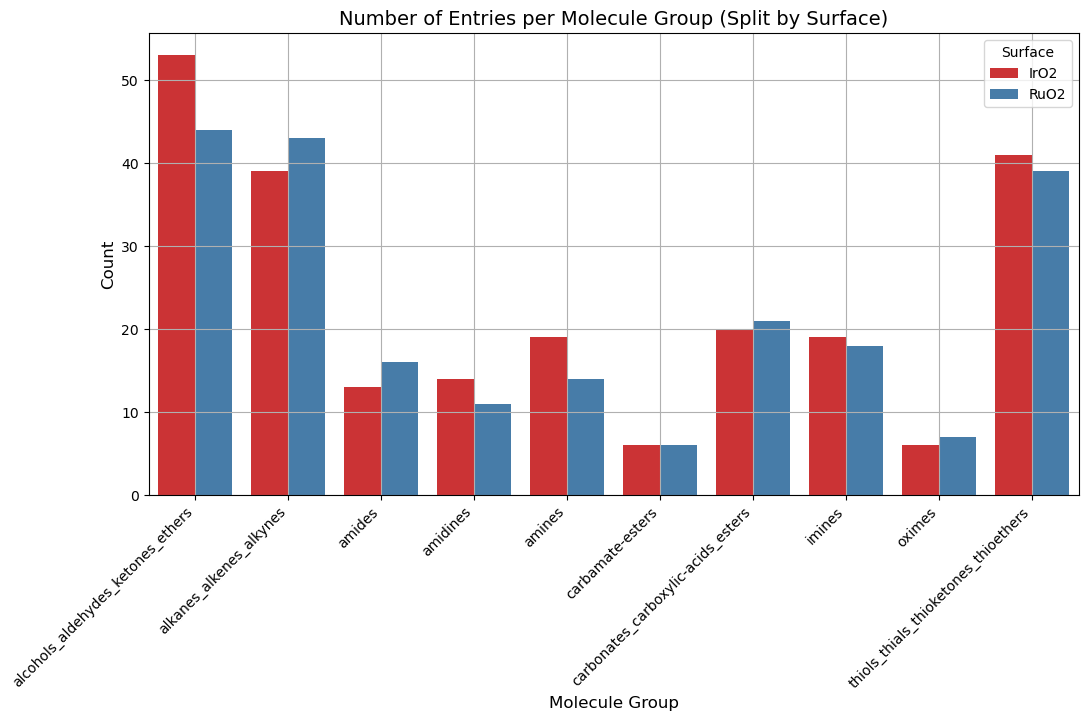

In [59]:
group_surface_counts = df_filtered.groupby(['Molecule Group', 'Surface']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x="Molecule Group", y="Count", hue="Surface", data=group_surface_counts, palette="Set1")

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of Entries per Molecule Group (Split by Surface)", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.legend(title="Surface")

plt.show()

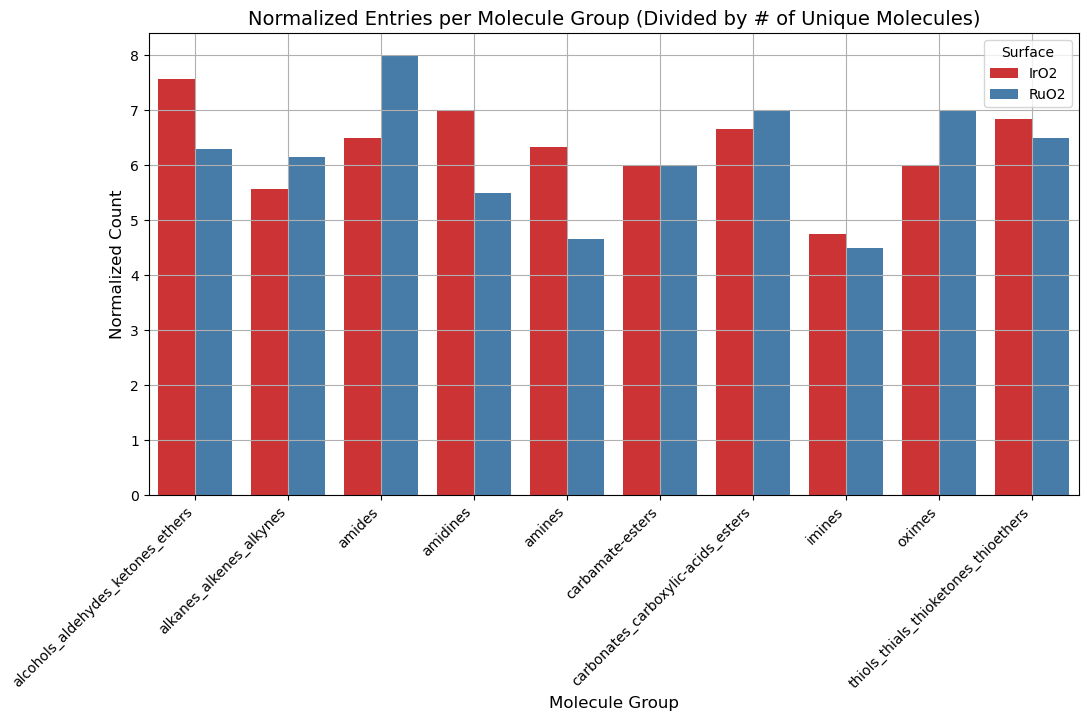

In [60]:
group_surface_counts = df_filtered.groupby(['Molecule Group', 'Surface']).size().reset_index(name='Count')

molecule_counts = df_filtered.groupby("Molecule Group")["Molecule"].nunique().reset_index(name="Total Molecules")

group_surface_counts = group_surface_counts.merge(molecule_counts, on="Molecule Group")
group_surface_counts["Normalized Count"] = group_surface_counts["Count"] / group_surface_counts["Total Molecules"]

plt.figure(figsize=(12, 6))
sns.barplot(x="Molecule Group", y="Normalized Count", hue="Surface", data=group_surface_counts, palette="Set1")

# Labels and title
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Normalized Count", fontsize=12)
plt.title("Normalized Entries per Molecule Group (Divided by # of Unique Molecules)", fontsize=14)
plt.grid(True)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.legend(title="Surface")

plt.show()

# Global Energy Distribution

In [61]:
df_filtered["Adsorption Energy"].describe()

count    449.000000
mean      -1.388993
std        0.978114
min       -4.457949
25%       -2.090462
50%       -1.285223
75%       -0.468205
max        0.881761
Name: Adsorption Energy, dtype: float64

In [62]:
df_RuO2["Adsorption Energy"].describe()

count    219.000000
mean      -1.046638
std        0.736413
min       -2.523143
25%       -1.704760
50%       -0.923527
75%       -0.371590
max        0.881761
Name: Adsorption Energy, dtype: float64

In [63]:
df_IrO2["Adsorption Energy"].describe()

count    230.000000
mean      -1.714974
std        1.066098
min       -4.457949
25%       -2.571961
50%       -1.857643
75%       -0.736131
max        0.776133
Name: Adsorption Energy, dtype: float64

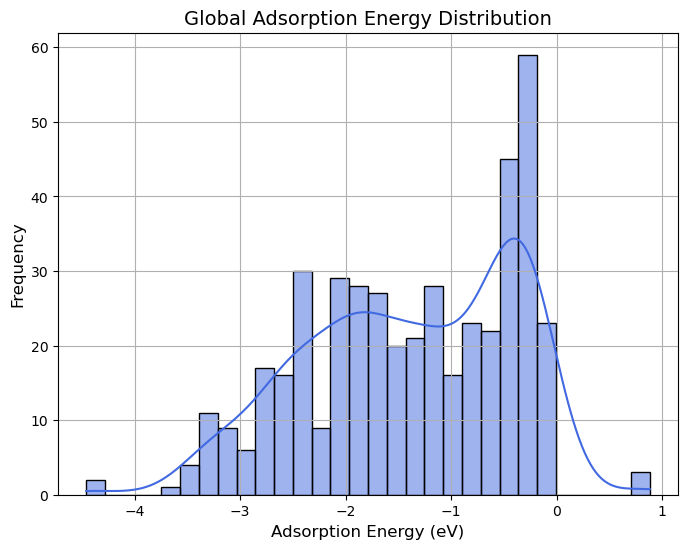

In [64]:
plt.figure(figsize=(8, 6))

sns.histplot(df_filtered["Adsorption Energy"], bins=30, kde=True, color="royalblue")

# Labels and formatting
plt.xlabel("Adsorption Energy (eV)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Global Adsorption Energy Distribution", fontsize=14)
plt.grid(True)

plt.show()

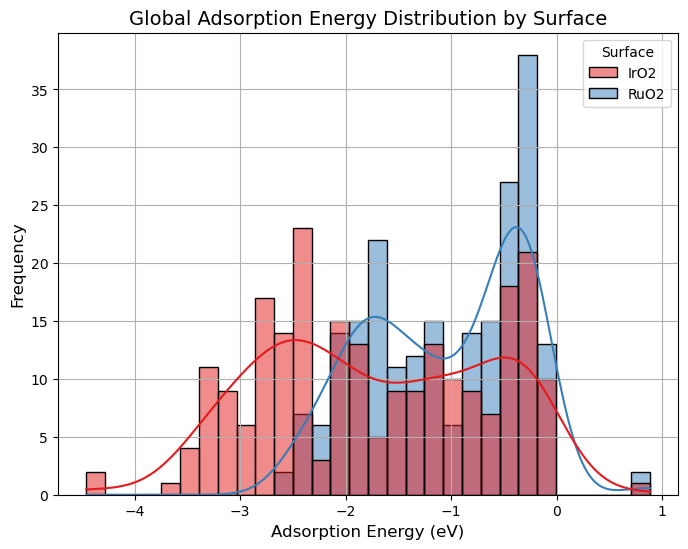

In [136]:
plt.figure(figsize=(8, 6))

sns.histplot(df_filtered, x="Adsorption Energy", hue="Surface", bins=30, kde=True, palette="Set1")

plt.xlabel("Adsorption Energy (eV)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Global Adsorption Energy Distribution by Surface", fontsize=14)
plt.grid(True)

plt.show()

# Molecule Group Insights

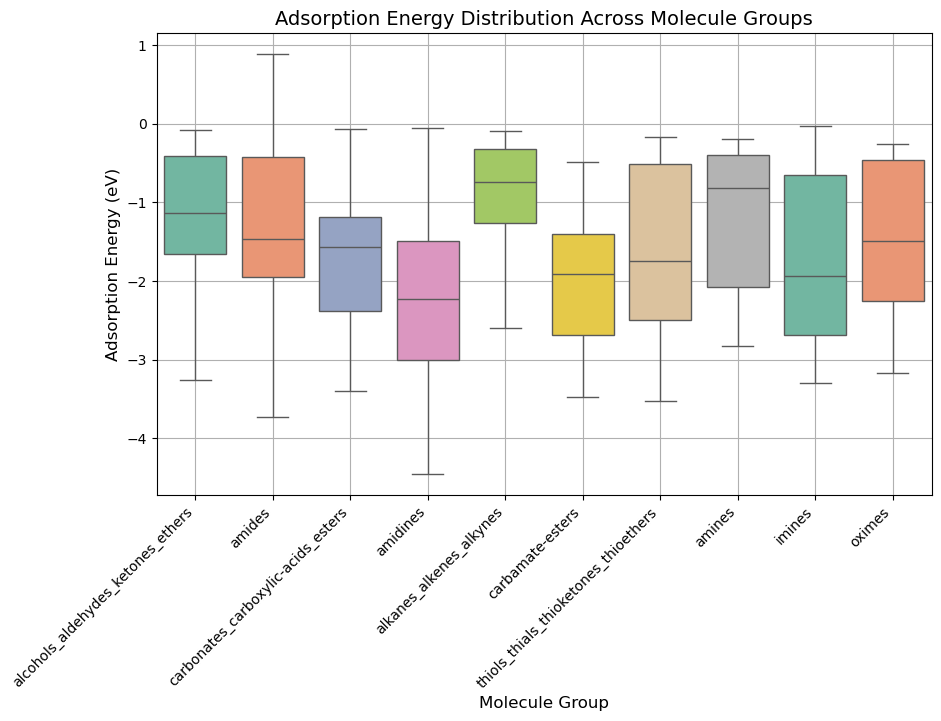

In [135]:
plt.figure(figsize=(10, 6))

sns.boxplot(x="Molecule Group", y="Adsorption Energy", data=df_filtered, hue="Molecule Group", palette="Set2", legend=False)

# Labels and formatting
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Adsorption Energy (eV)", fontsize=12)
plt.title("Adsorption Energy Distribution Across Molecule Groups", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x labels for readability
plt.grid(True)

plt.show()

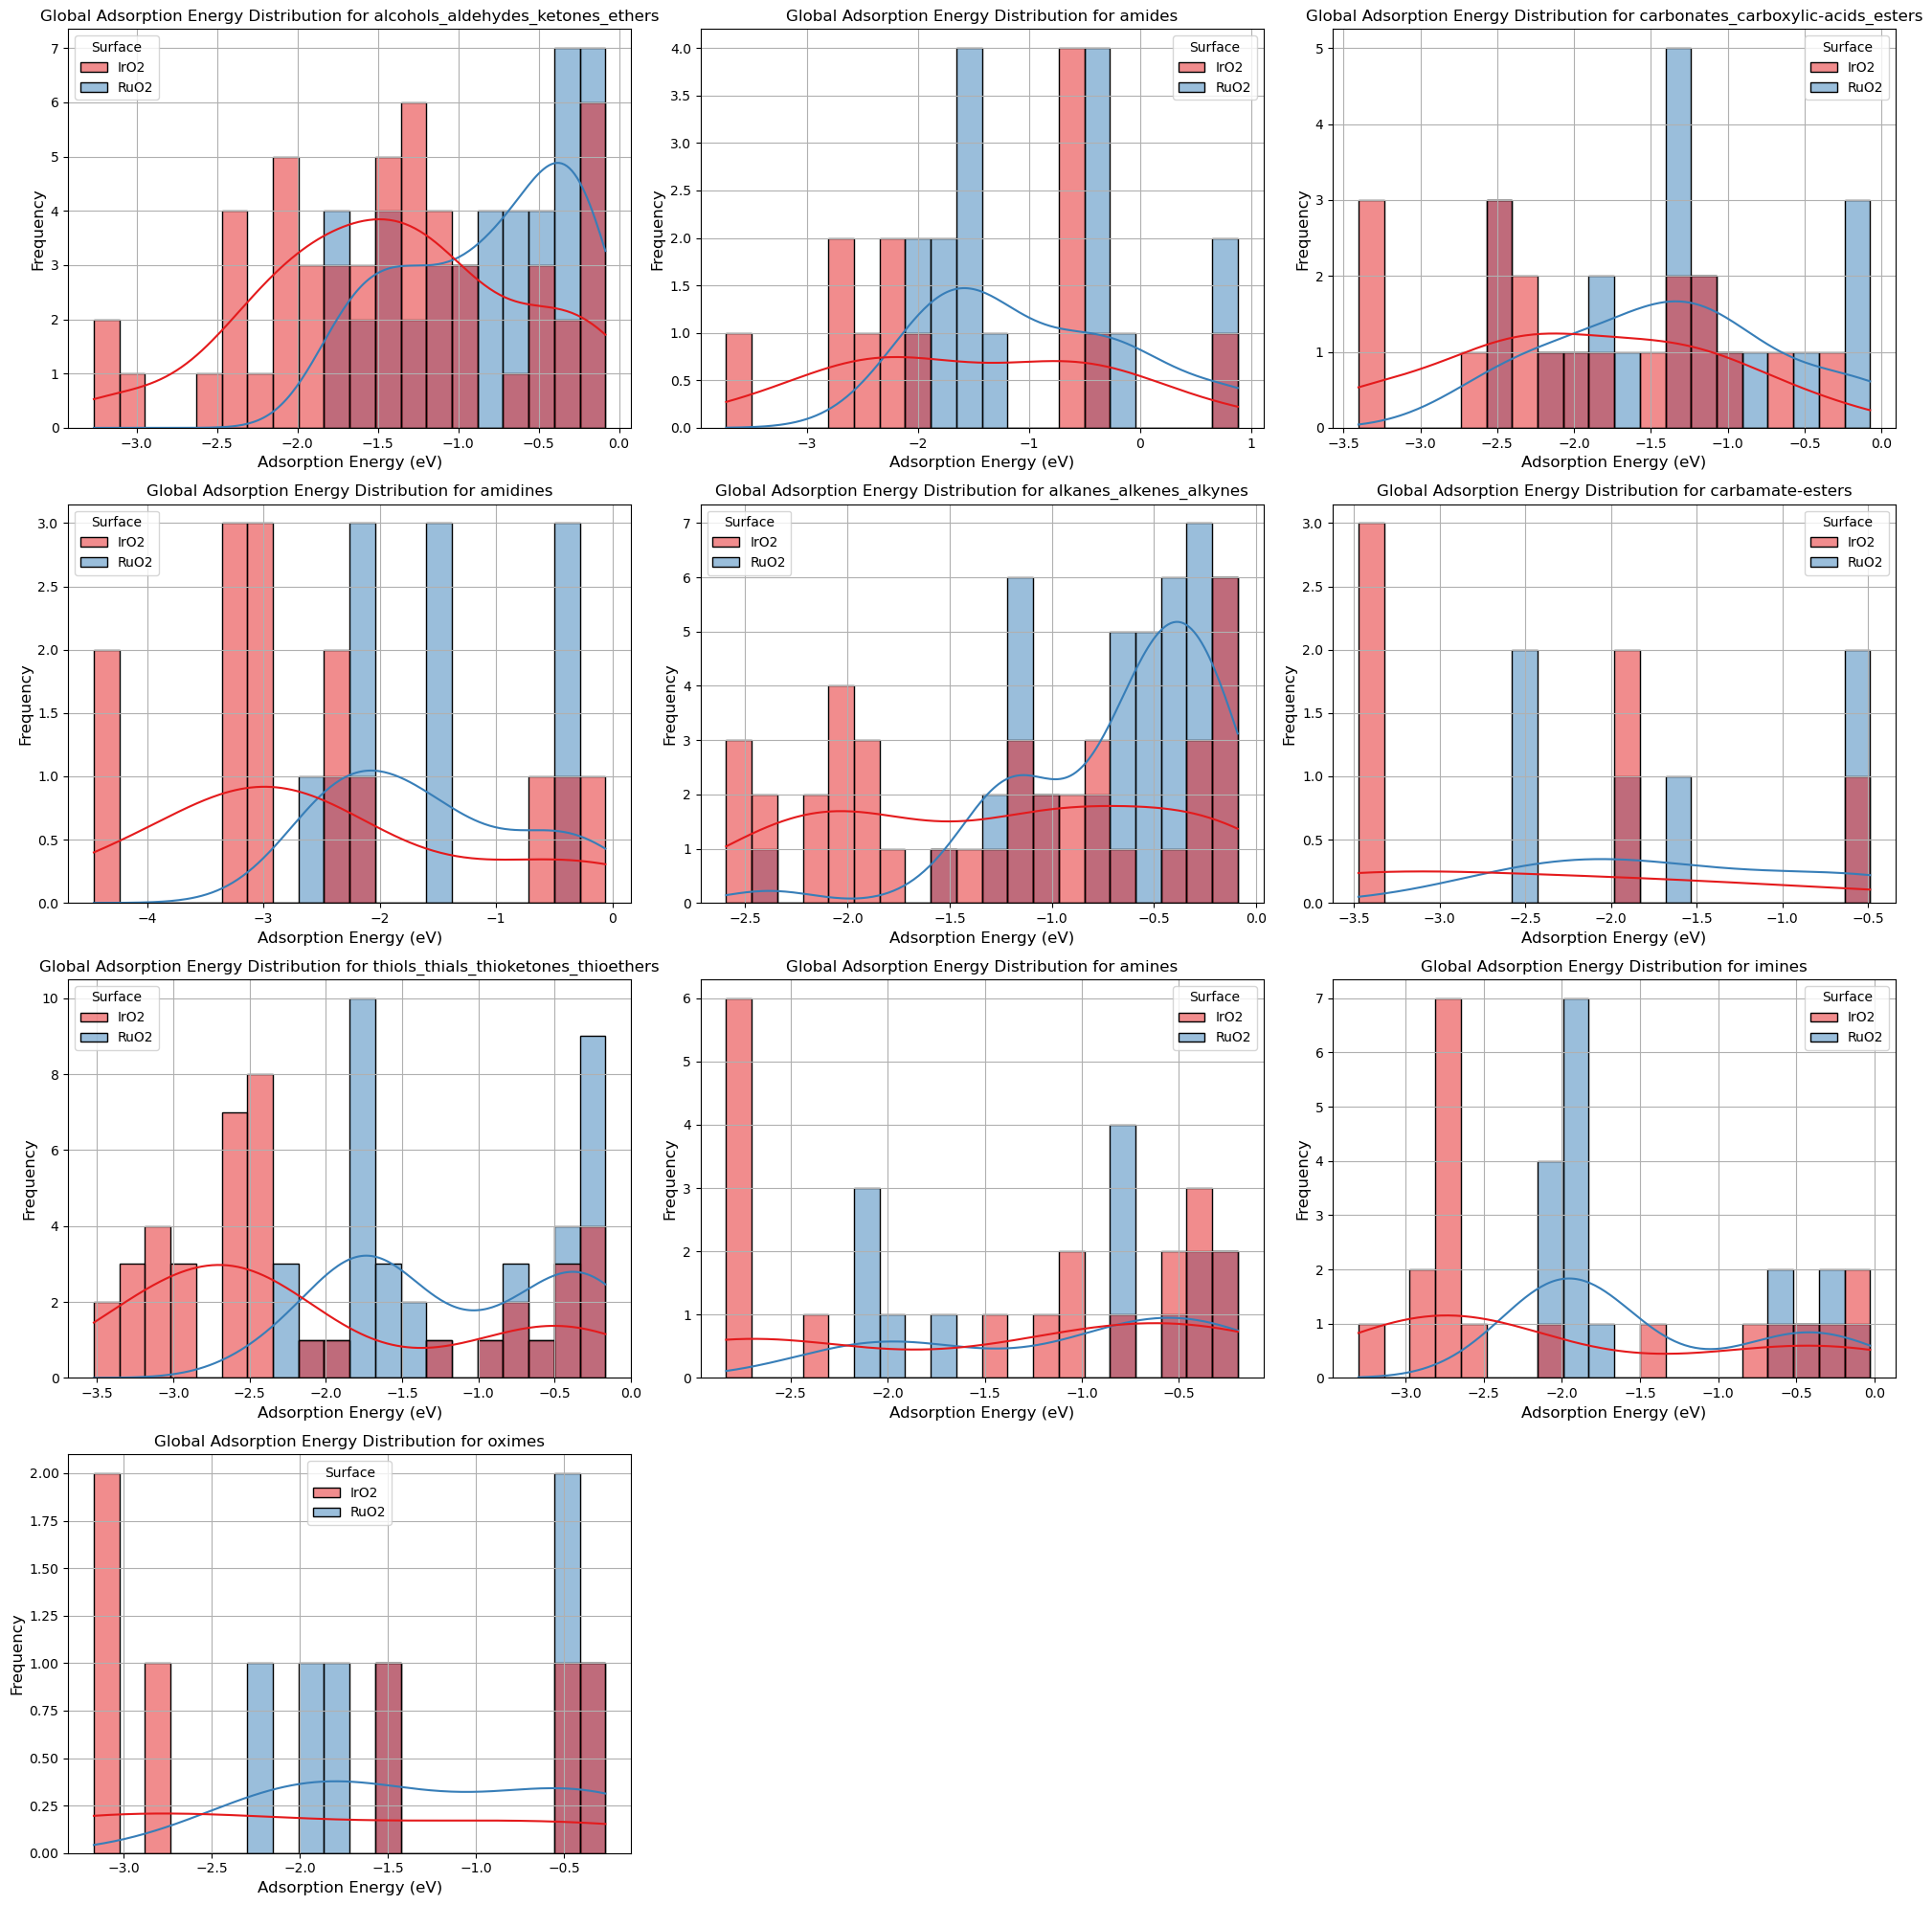

In [134]:

molecule_groups = df_filtered['Molecule Group'].unique()

num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_filtered[df_filtered['Molecule Group'] == group]
    
    sns.histplot(group_data, x='Adsorption Energy', hue='Surface', bins=20, kde=True, ax=axes[i], palette="Set1")
    
    # Set the title and labels
    axes[i].set_title(f"Global Adsorption Energy Distribution for {group}", fontsize=12)
    axes[i].set_xlabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
fig.tight_layout()

# Show the plot
plt.show()

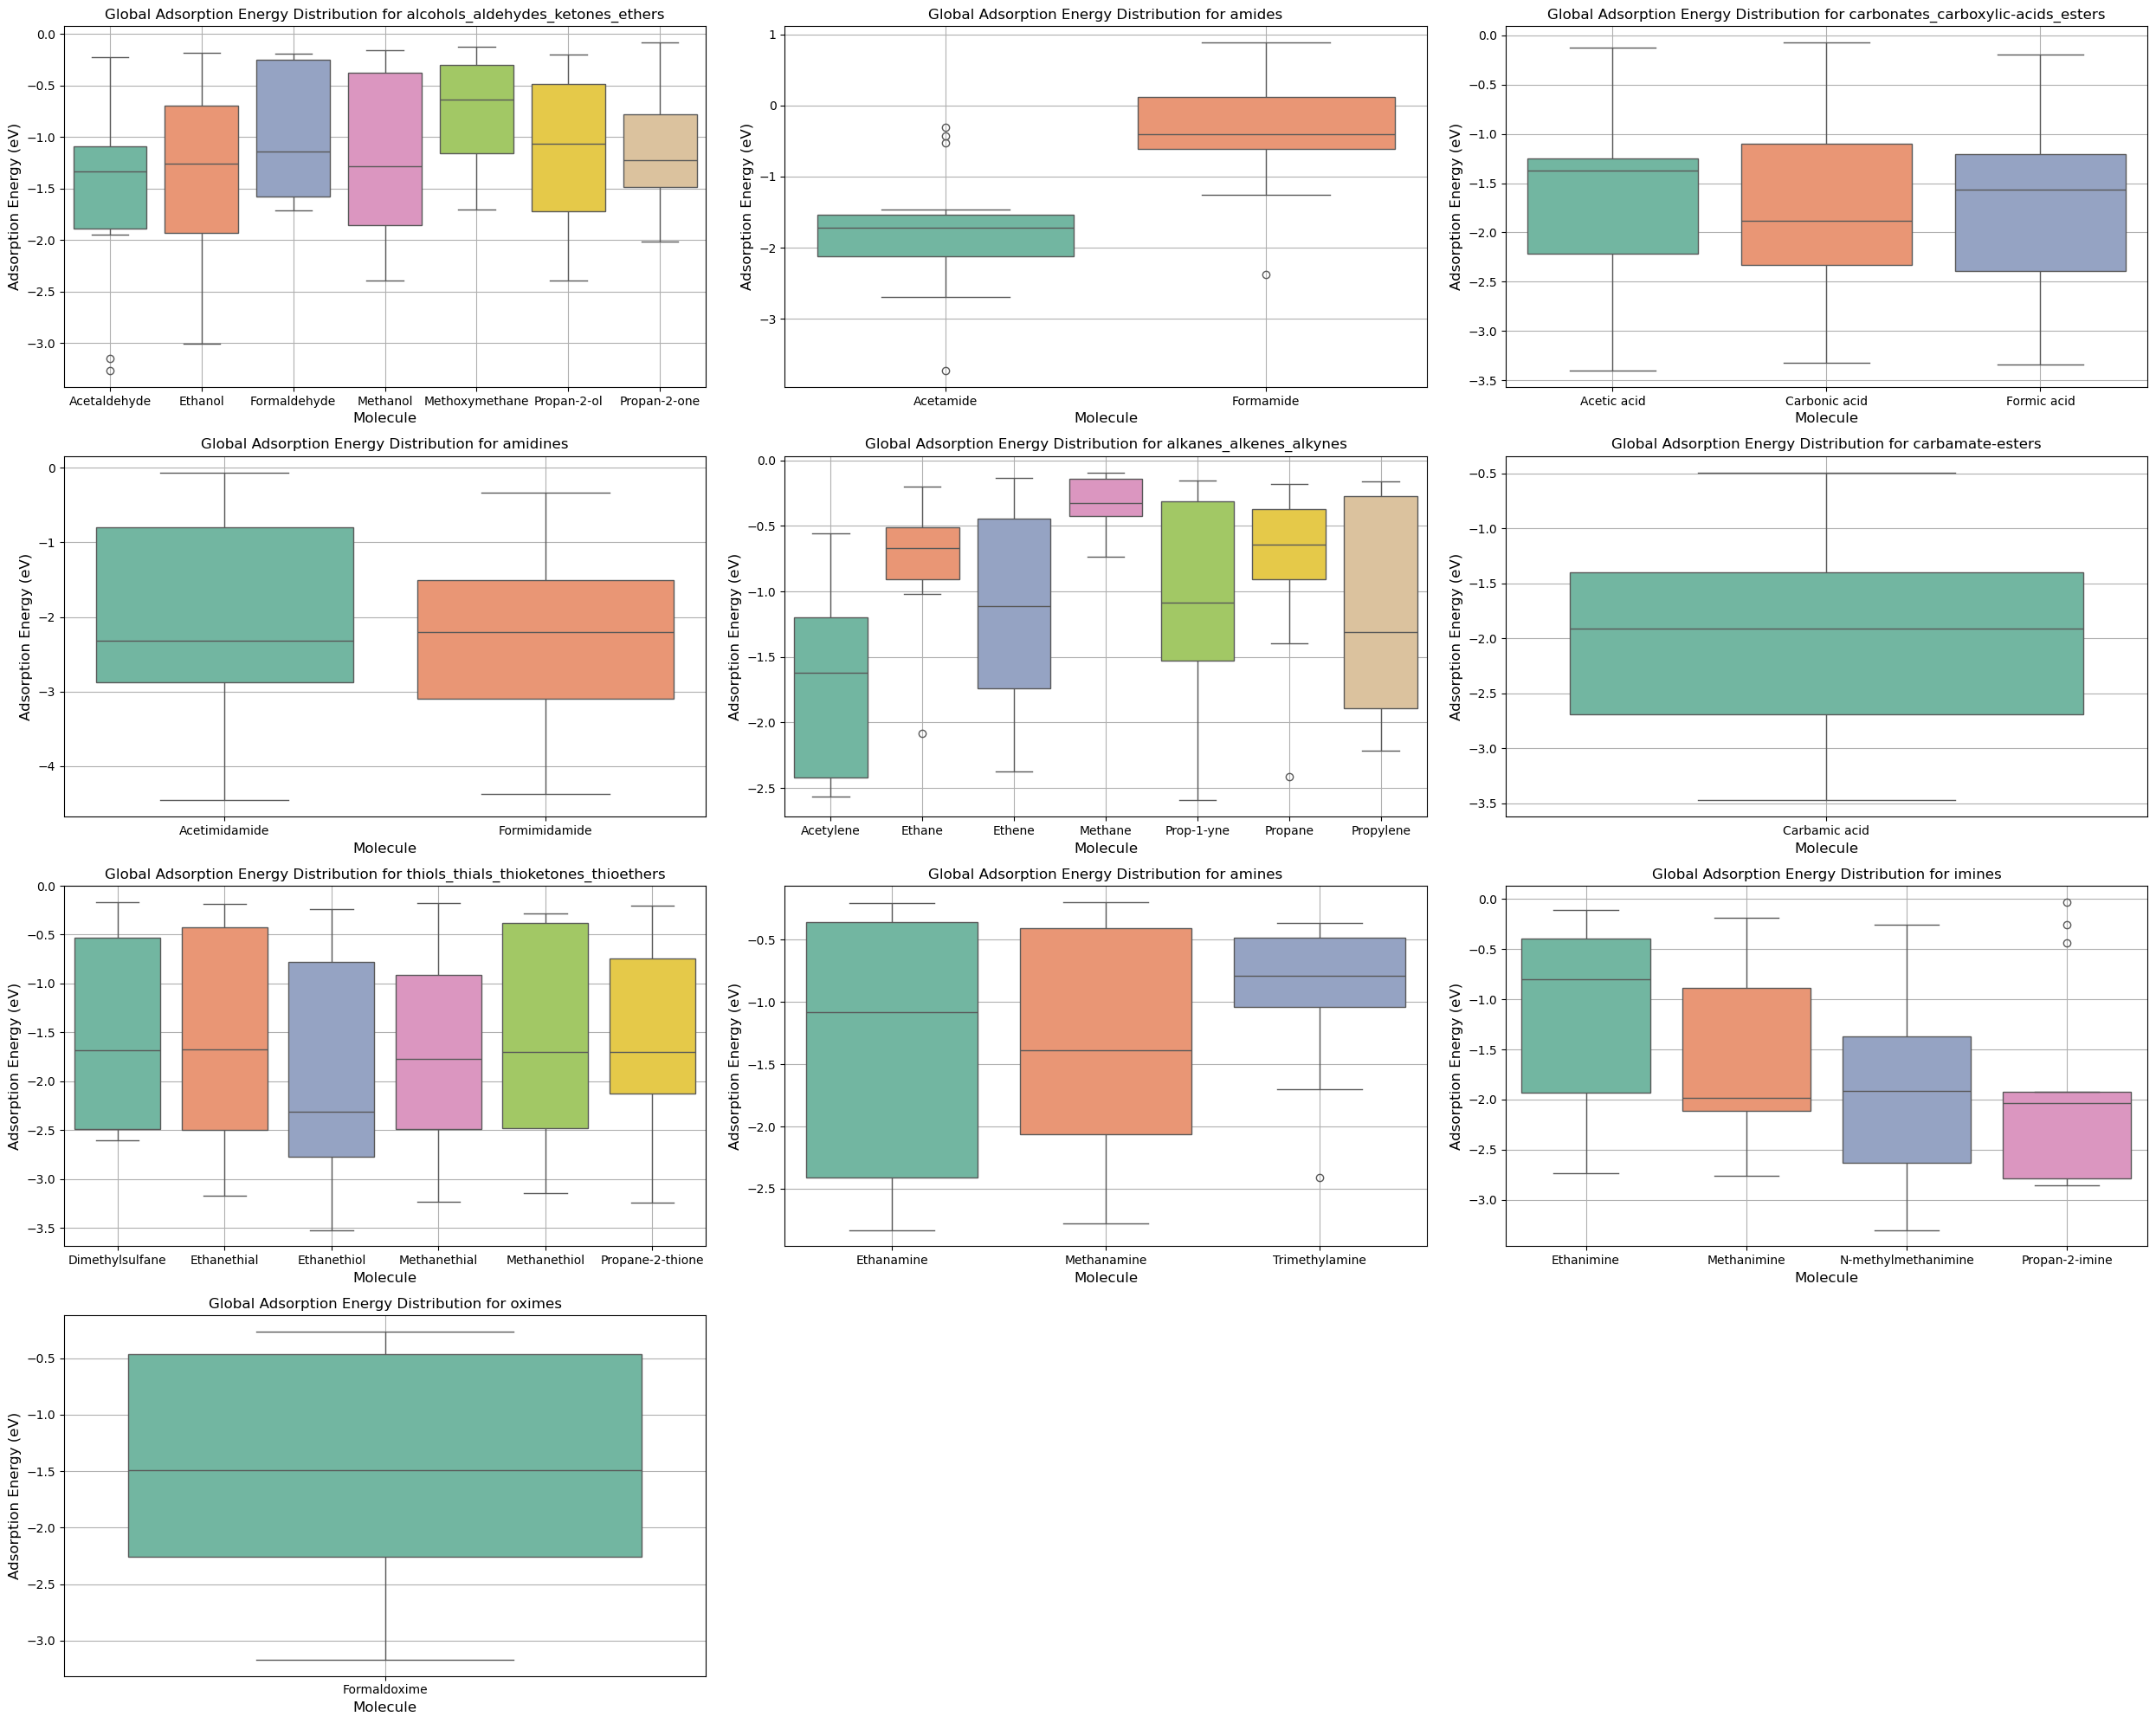

In [133]:
molecule_groups = df_filtered['Molecule Group'].unique()

# Determine the number of groups and adjust the grid size
num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_filtered[df_filtered['Molecule Group'] == group]
    
    # Plot boxplot for each molecule group
    sns.boxplot(x='Molecule', y='Adsorption Energy', data=group_data, ax=axes[i], hue='Molecule', palette="Set2", legend=False)
    
    # Set the title and labels for each plot
    axes[i].set_title(f"Global Adsorption Energy Distribution for {group}", fontsize=12)
    axes[i].set_xlabel("Molecule", fontsize=12)
    axes[i].set_ylabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap and improve readability
fig.tight_layout()

# Show the plot
plt.show()


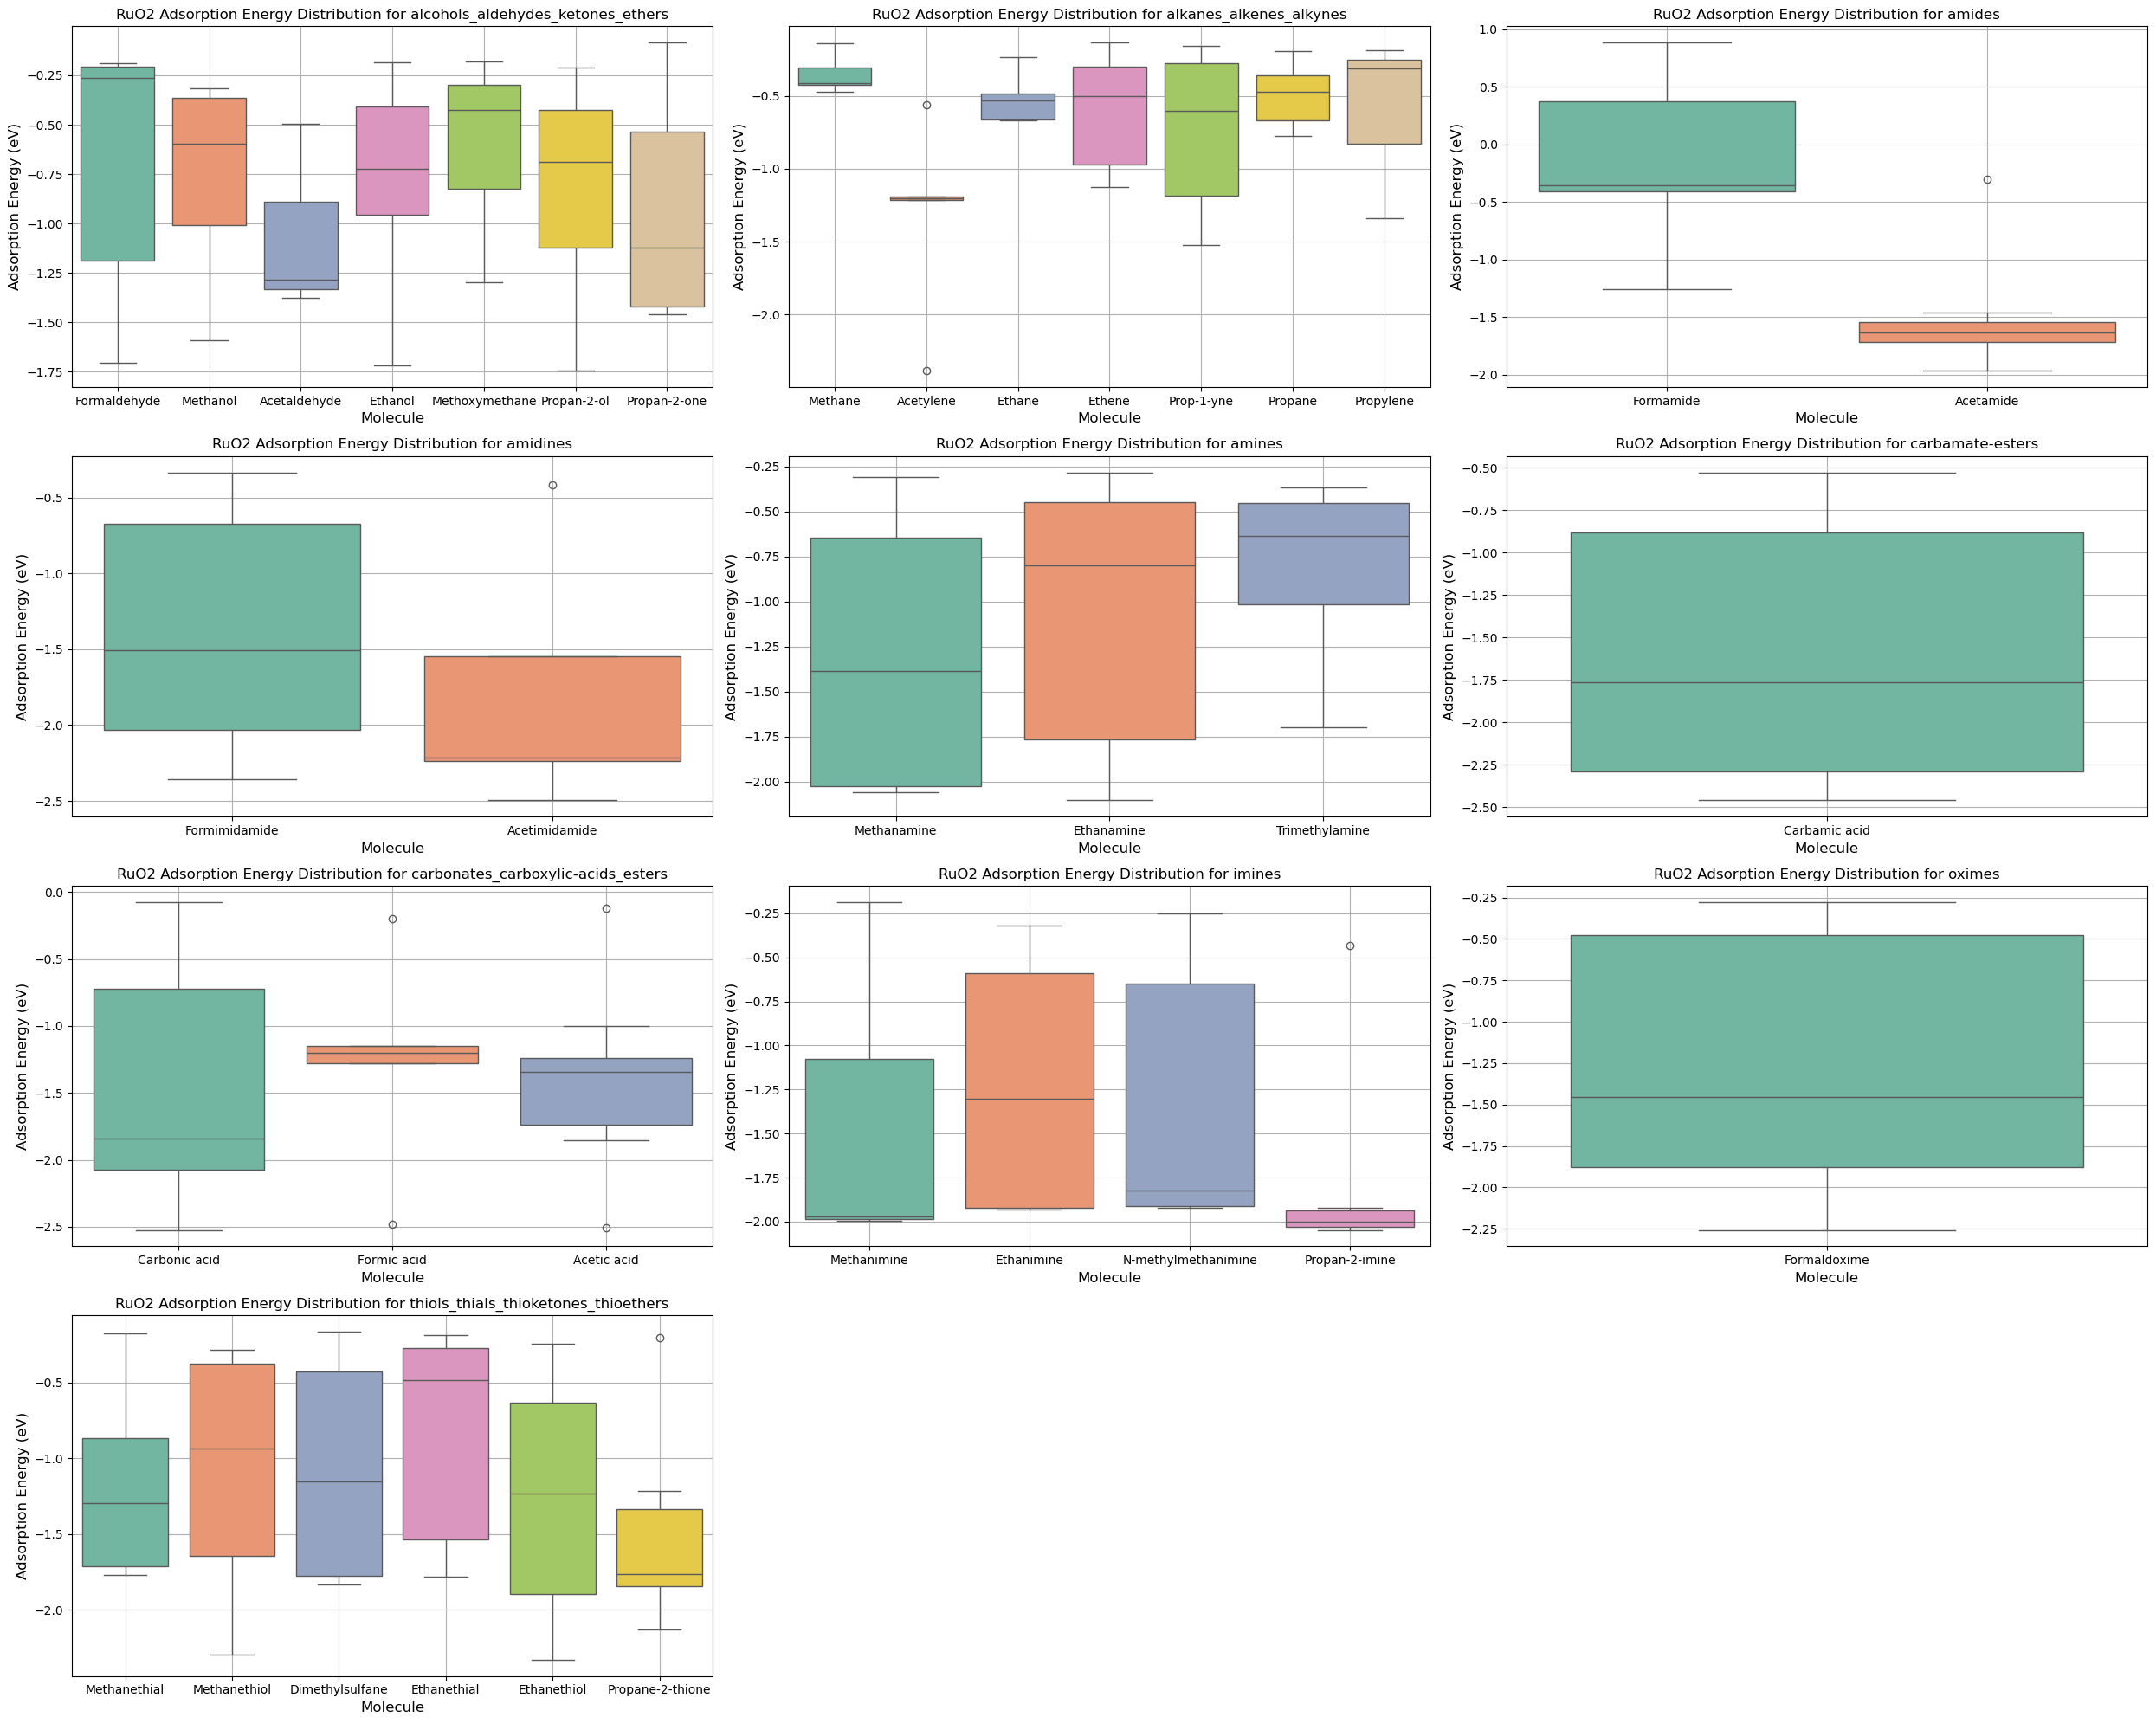

In [132]:
molecule_groups = df_RuO2['Molecule Group'].unique()

# Determine the number of groups and adjust the grid size
num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_RuO2[df_RuO2['Molecule Group'] == group]
    
    # Plot boxplot for each molecule group
    sns.boxplot(x='Molecule', y='Adsorption Energy', data=group_data, ax=axes[i], hue='Molecule', palette="Set2", legend=False)
    
    # Set the title and labels for each plot
    axes[i].set_title(f"RuO2 Adsorption Energy Distribution for {group}", fontsize=12)
    axes[i].set_xlabel("Molecule", fontsize=12)
    axes[i].set_ylabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap and improve readability
fig.tight_layout()

# Show the plot
plt.show()

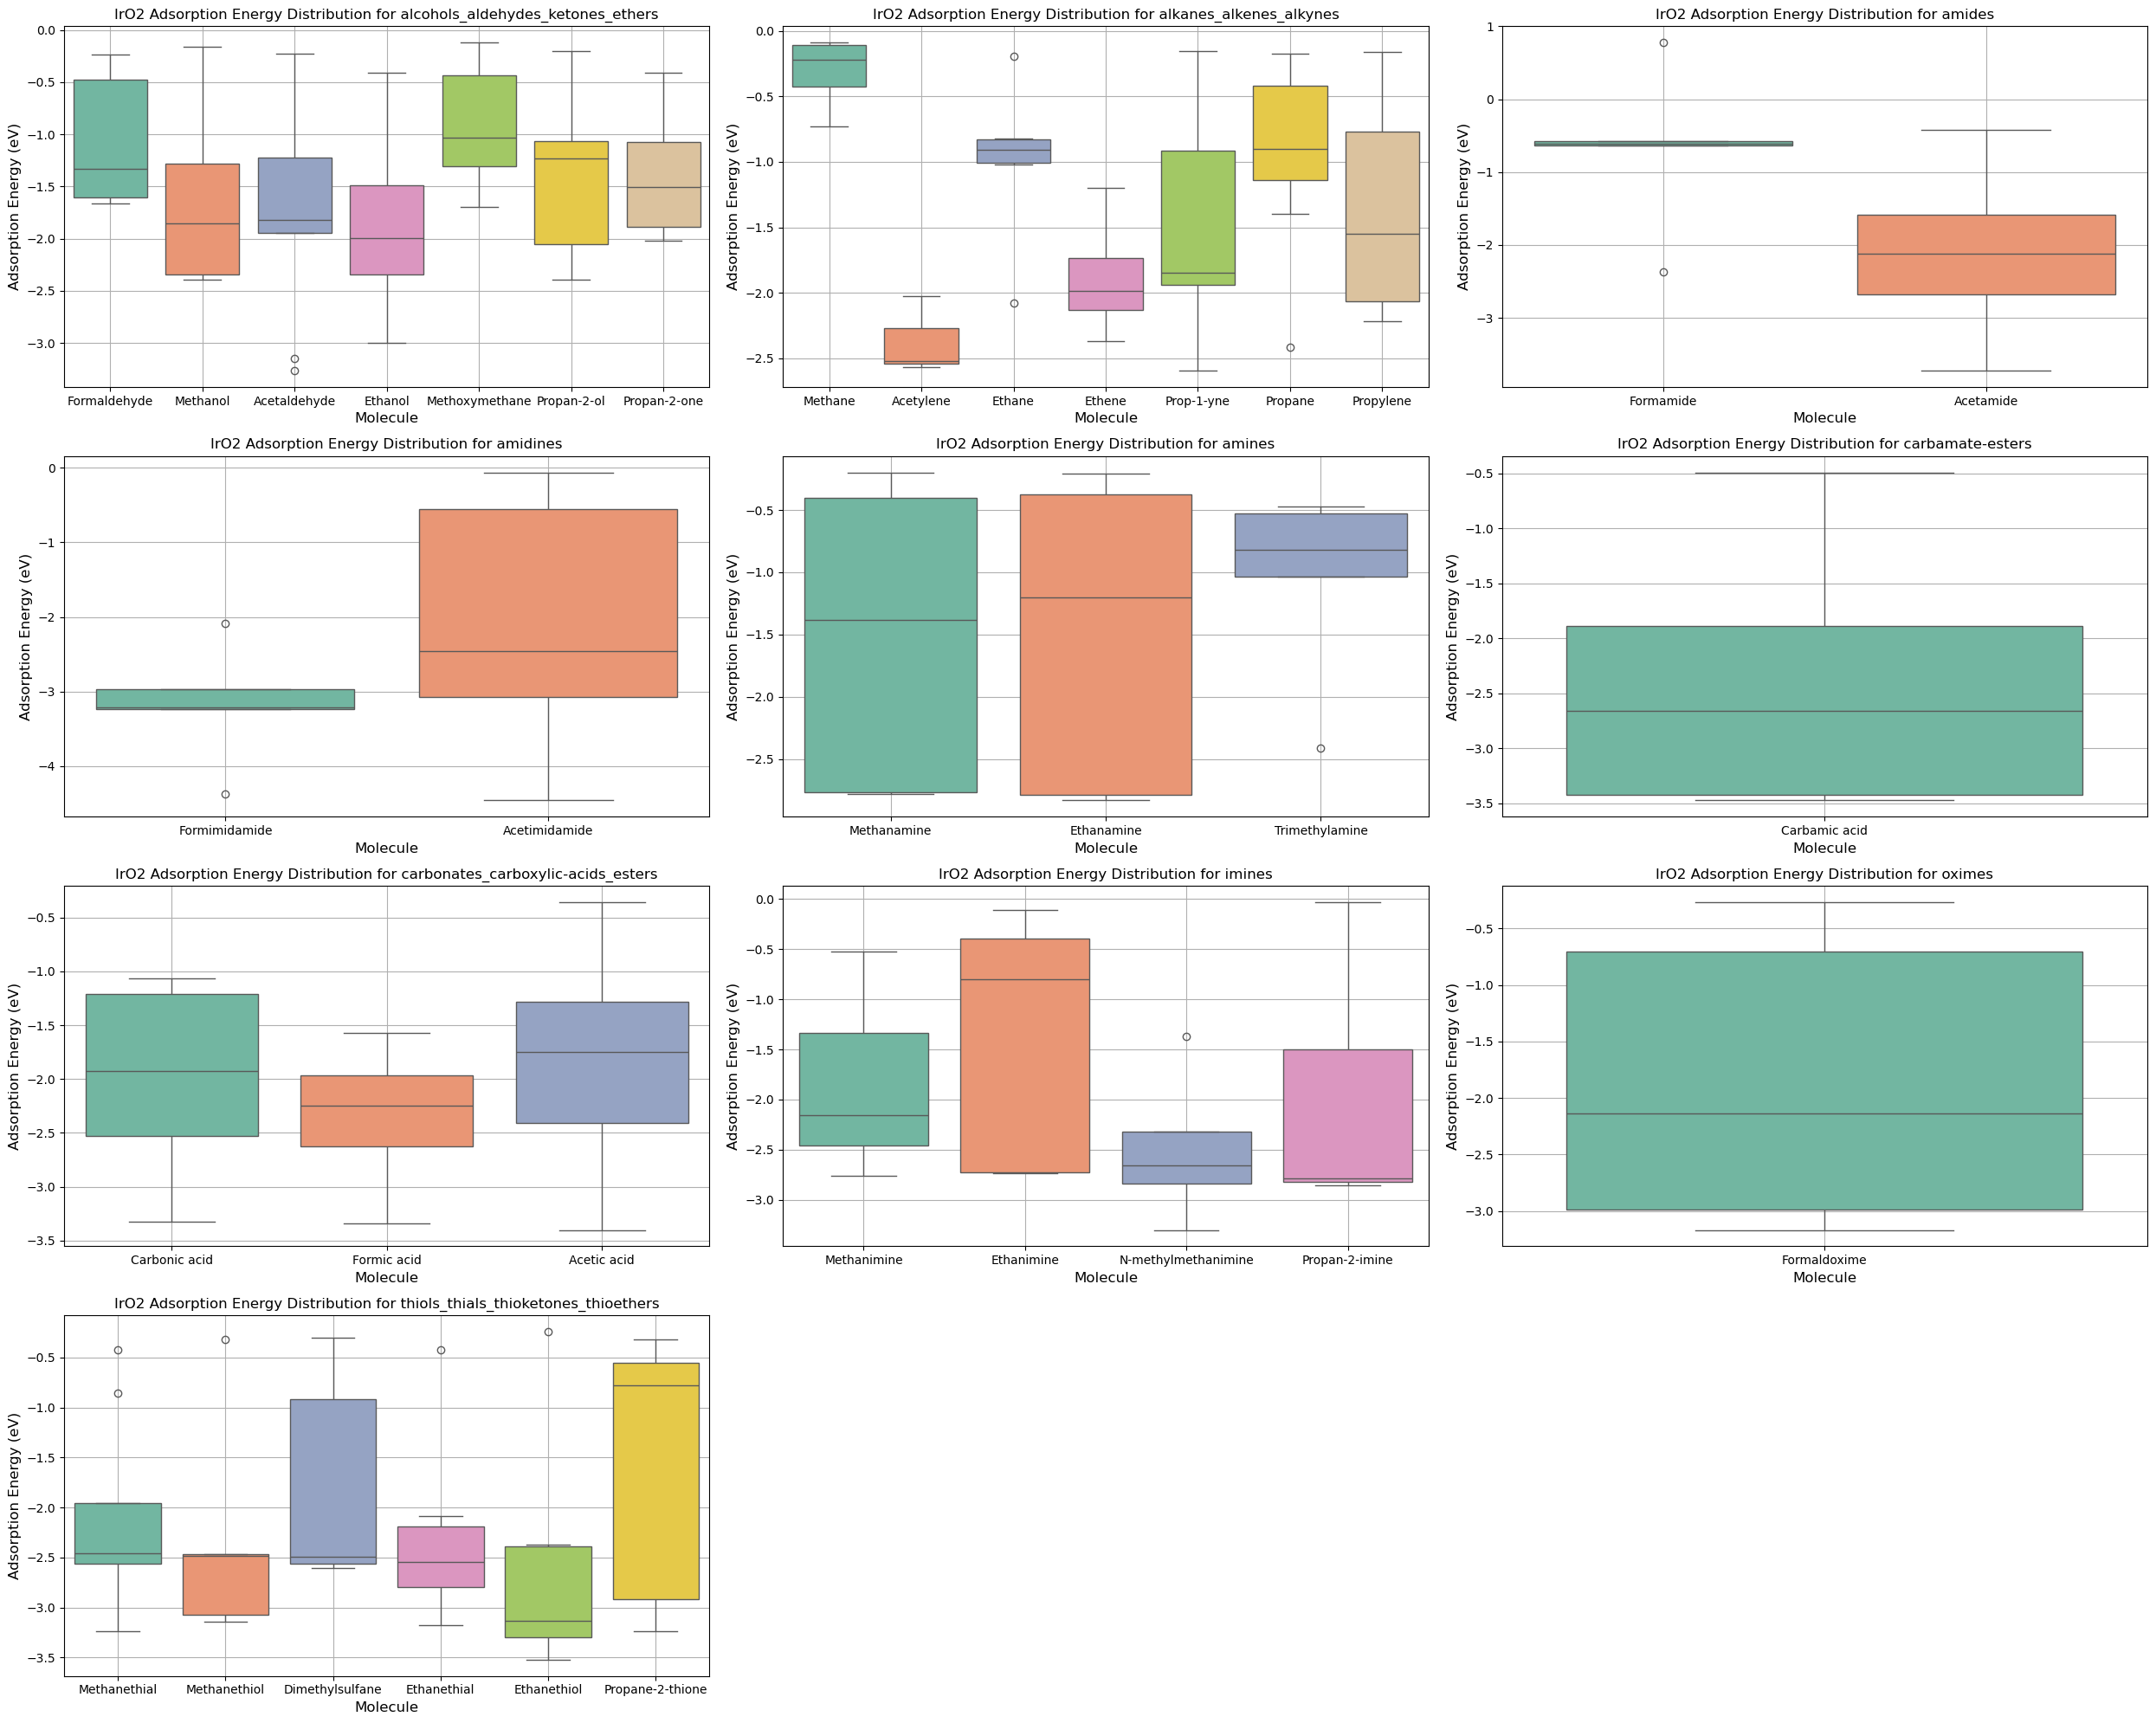

In [131]:
molecule_groups = df_IrO2['Molecule Group'].unique()

# Determine the number of groups and adjust the grid size
num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_IrO2[df_IrO2['Molecule Group'] == group]
    
    # Plot boxplot for each molecule group
    sns.boxplot(x='Molecule', y='Adsorption Energy', data=group_data, ax=axes[i], hue='Molecule', palette="Set2", legend=False)
    
    # Set the title and labels for each plot
    axes[i].set_title(f"IrO2 Adsorption Energy Distribution for {group}", fontsize=12)
    axes[i].set_xlabel("Molecule", fontsize=12)
    axes[i].set_ylabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap and improve readability
fig.tight_layout()

# Show the plot
plt.show()

# Number of Carbons Insights

In [138]:
site_counts = df_filtered['Number of C'].value_counts()
print(site_counts)

Number of C
2    197
1    141
3    111
Name: count, dtype: int64


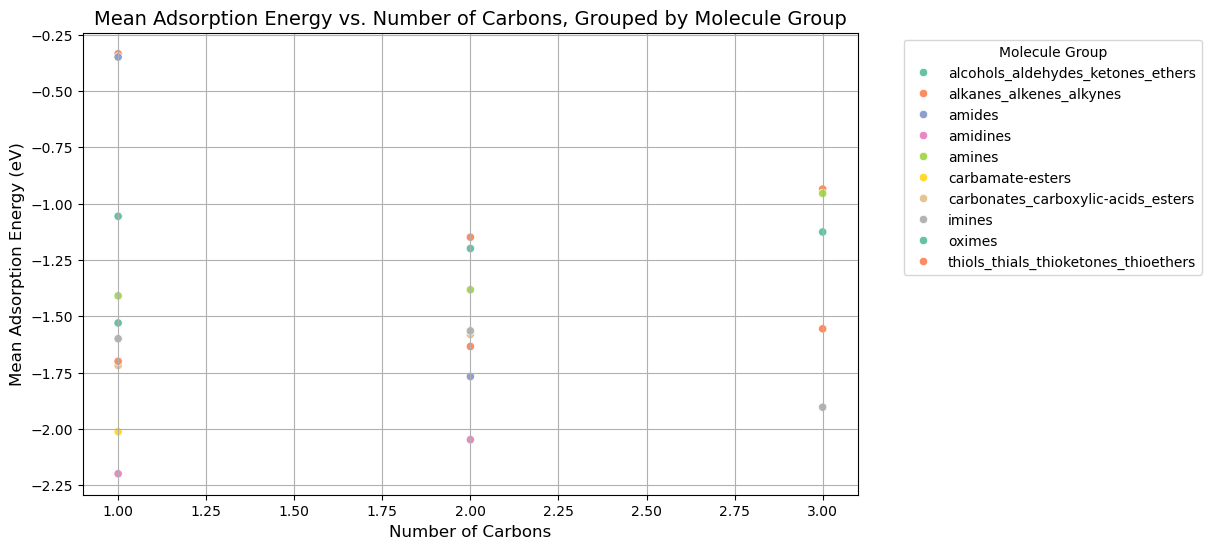

In [71]:
df_mean = df_filtered.groupby(["Number of C", "Molecule Group"])["Adsorption Energy"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Number of C", y="Adsorption Energy", hue="Molecule Group", data=df_mean, palette="Set2")

plt.xlabel("Number of Carbons", fontsize=12)
plt.ylabel("Mean Adsorption Energy (eV)", fontsize=12)
plt.title("Mean Adsorption Energy vs. Number of Carbons, Grouped by Molecule Group", fontsize=14)
plt.grid(True)

plt.legend(title="Molecule Group", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

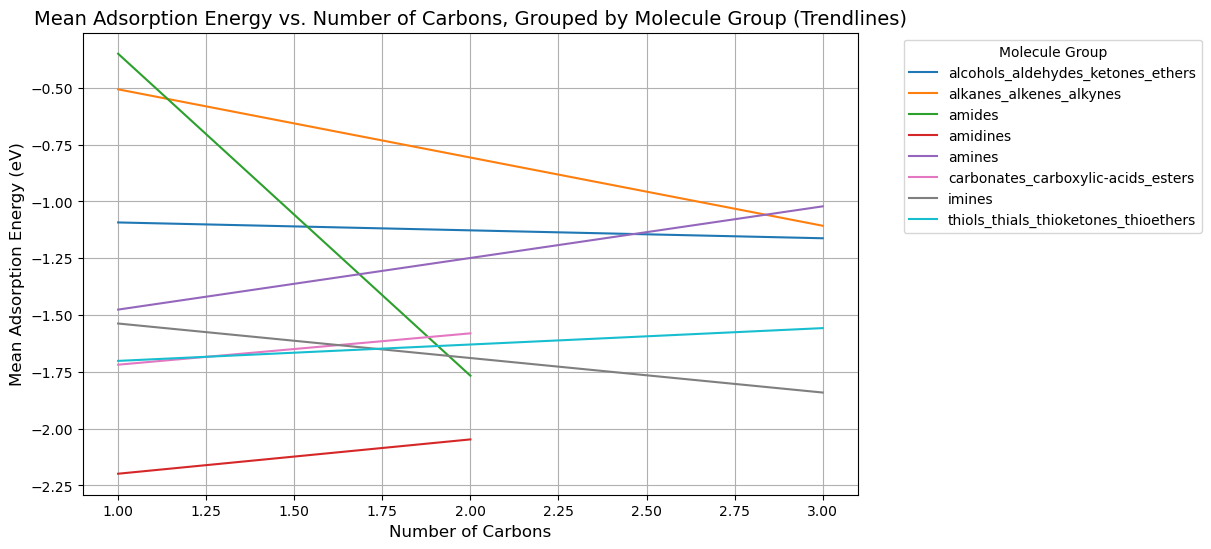

In [72]:
df_mean = df_filtered.groupby(["Number of C", "Molecule Group"])["Adsorption Energy"].mean().reset_index()

plt.figure(figsize=(10, 6))

for group in df_mean['Molecule Group'].unique():
    group_data = df_mean[df_mean['Molecule Group'] == group]
    
    # Use sns.regplot() for trendline (order=1 for linear fit)
    sns.regplot(x="Number of C", y="Adsorption Energy", data=group_data, 
                scatter=False,  # Keep the scatter points
                fit_reg=True,  # Fit a regression line
                order=1,       # Linear trendline
                label=group,   # Label each line
                scatter_kws={'s': 100, 'edgecolor': 'w', 'alpha': 0.7}, # Customize points
                line_kws={'linewidth': 1.5},
                ci=None,
                )  

# Labels and formatting
plt.xlabel("Number of Carbons", fontsize=12)
plt.ylabel("Mean Adsorption Energy (eV)", fontsize=12)
plt.title("Mean Adsorption Energy vs. Number of Carbons, Grouped by Molecule Group (Trendlines)", fontsize=14)
plt.grid(True)

plt.legend(title="Molecule Group", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

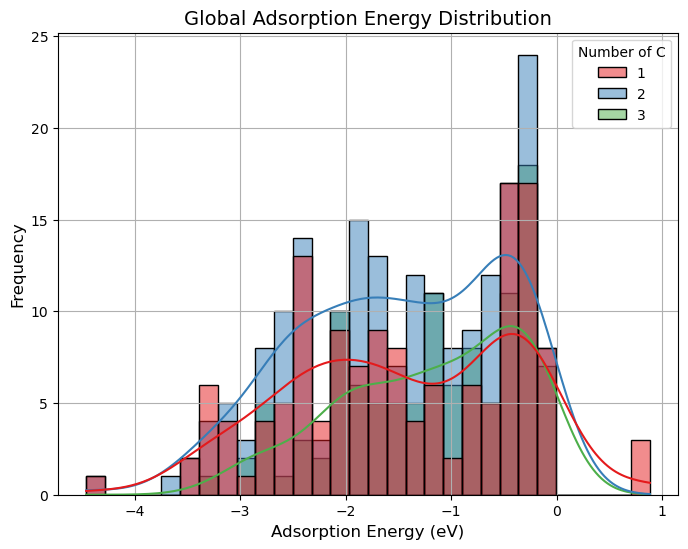

In [130]:
plt.figure(figsize=(8, 6))

sns.histplot(df_filtered, x = "Adsorption Energy", hue = 'Number of C' , bins=30, kde=True, palette="Set1")

# Labels and formatting
plt.xlabel("Adsorption Energy (eV)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Global Adsorption Energy Distribution", fontsize=14)
plt.grid(True)

plt.show()

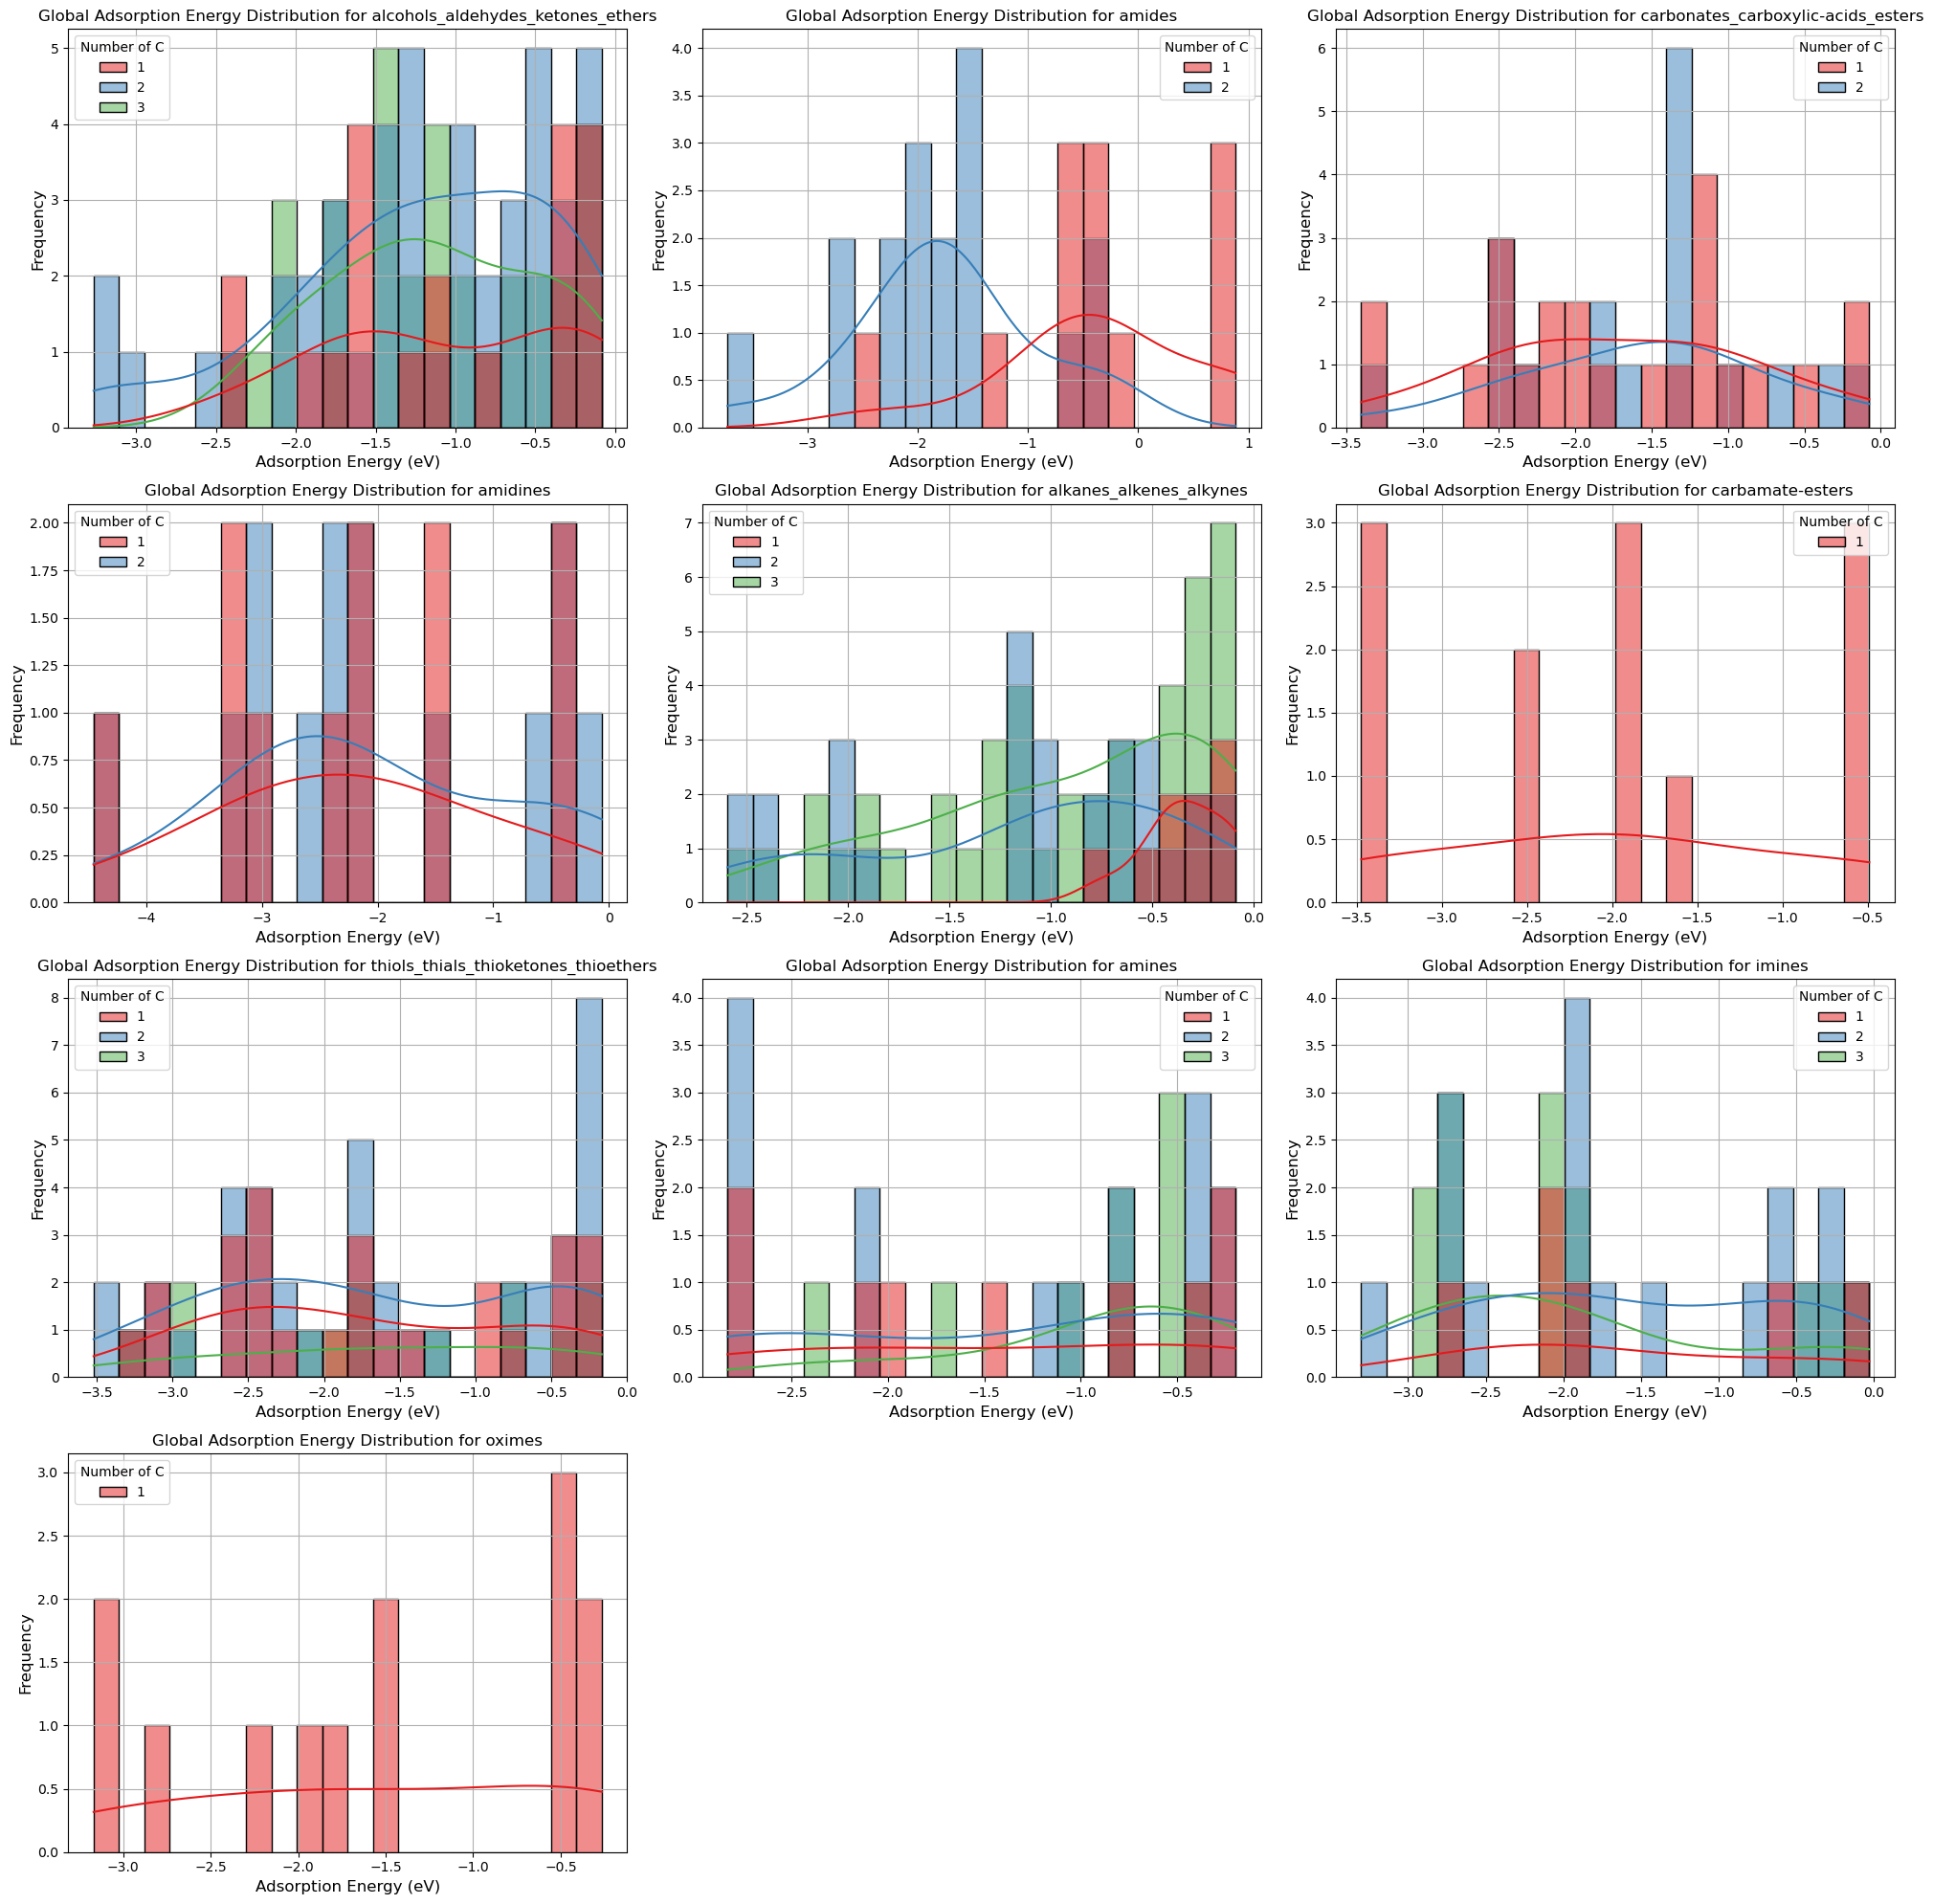

In [129]:

molecule_groups = df_filtered['Molecule Group'].unique()

num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_filtered[df_filtered['Molecule Group'] == group]
    
    sns.histplot(group_data, x='Adsorption Energy', hue='Number of C', bins=20, kde=True, ax=axes[i], palette="Set1")
    
    # Set the title and labels
    axes[i].set_title(f"Global Adsorption Energy Distribution for {group}", fontsize=12)
    axes[i].set_xlabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
fig.tight_layout()

# Show the plot
plt.show()

/home/tvanhout/miniconda3/envs/oxides_ML/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


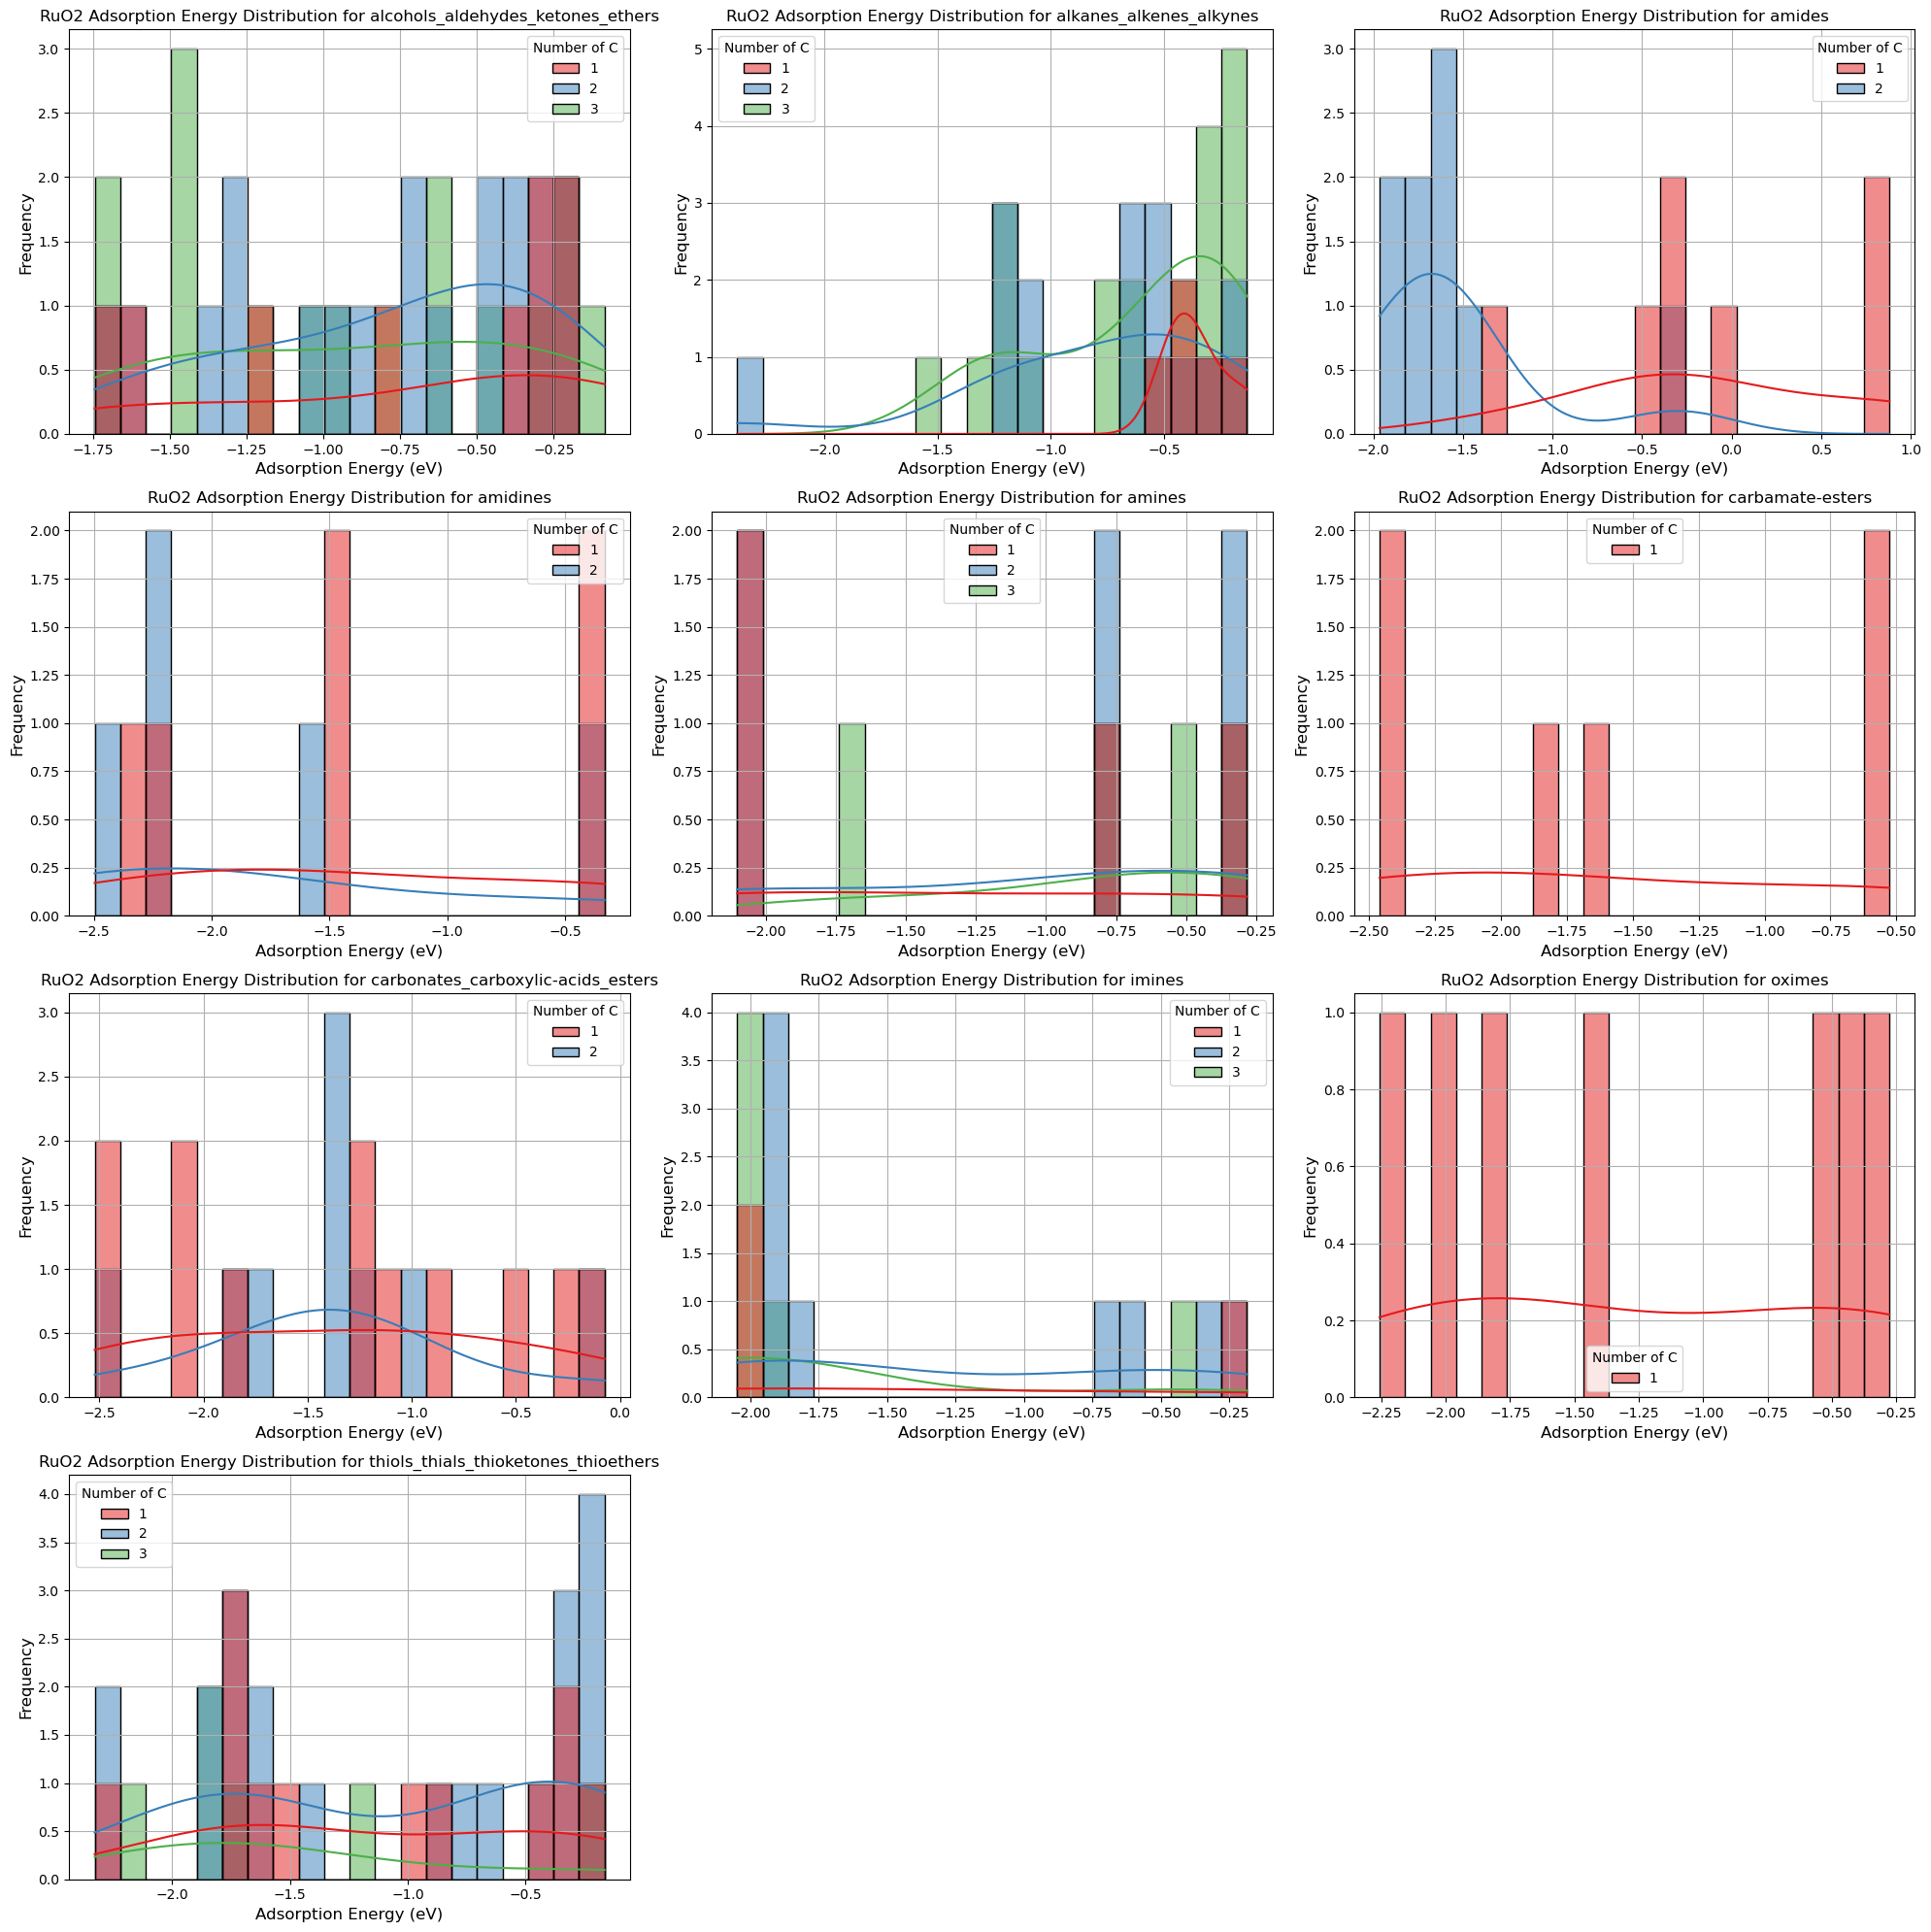

In [128]:

molecule_groups = df_RuO2['Molecule Group'].unique()

num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_RuO2[df_RuO2['Molecule Group'] == group]
    
    sns.histplot(group_data, x='Adsorption Energy', hue='Number of C', bins=20, kde=True, ax=axes[i], palette="Set1")
    
    # Set the title and labels
    axes[i].set_title(f"RuO2 Adsorption Energy Distribution for {group}", fontsize=12)
    axes[i].set_xlabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
fig.tight_layout()

# Show the plot
plt.show()

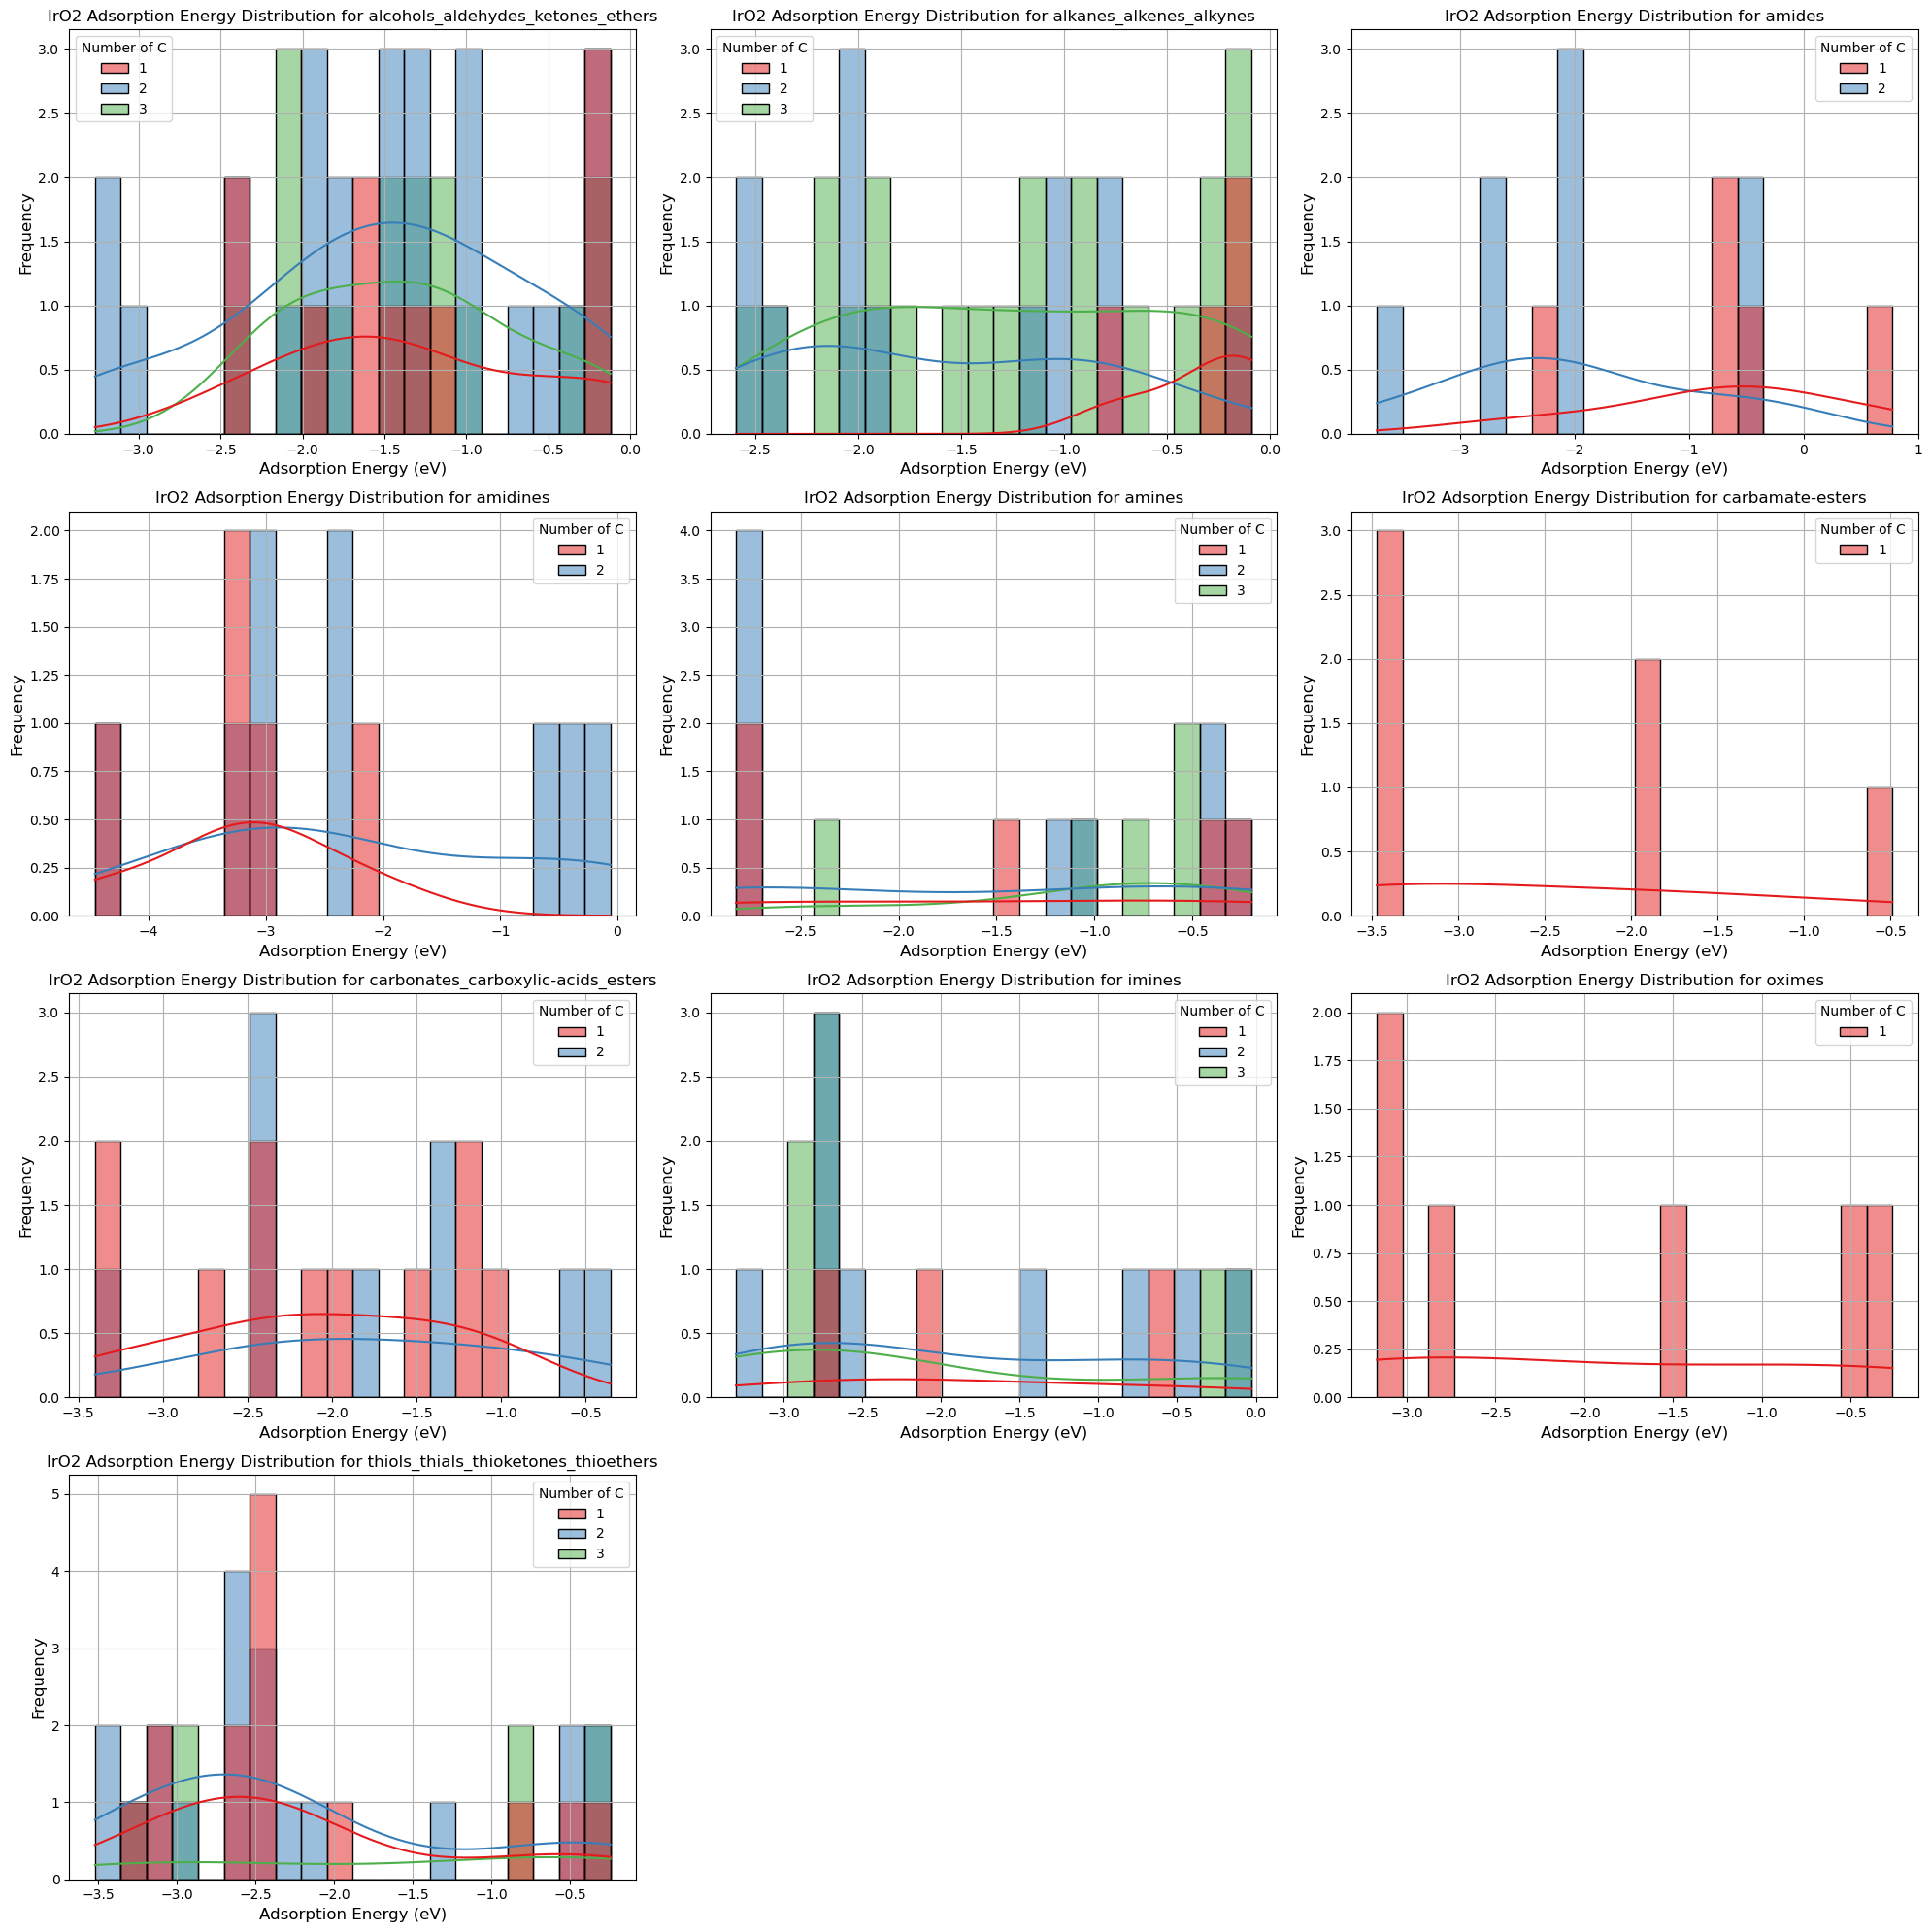

In [127]:

molecule_groups = df_IrO2['Molecule Group'].unique()

num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_IrO2[df_IrO2['Molecule Group'] == group]
    
    sns.histplot(group_data, x='Adsorption Energy', hue='Number of C', bins=20, kde=True, ax=axes[i], palette="Set1")
    
    # Set the title and labels
    axes[i].set_title(f"IrO2 Adsorption Energy Distribution for {group}", fontsize=12)
    axes[i].set_xlabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
fig.tight_layout()

# Show the plot
plt.show()

# Number of Hydrogen insights

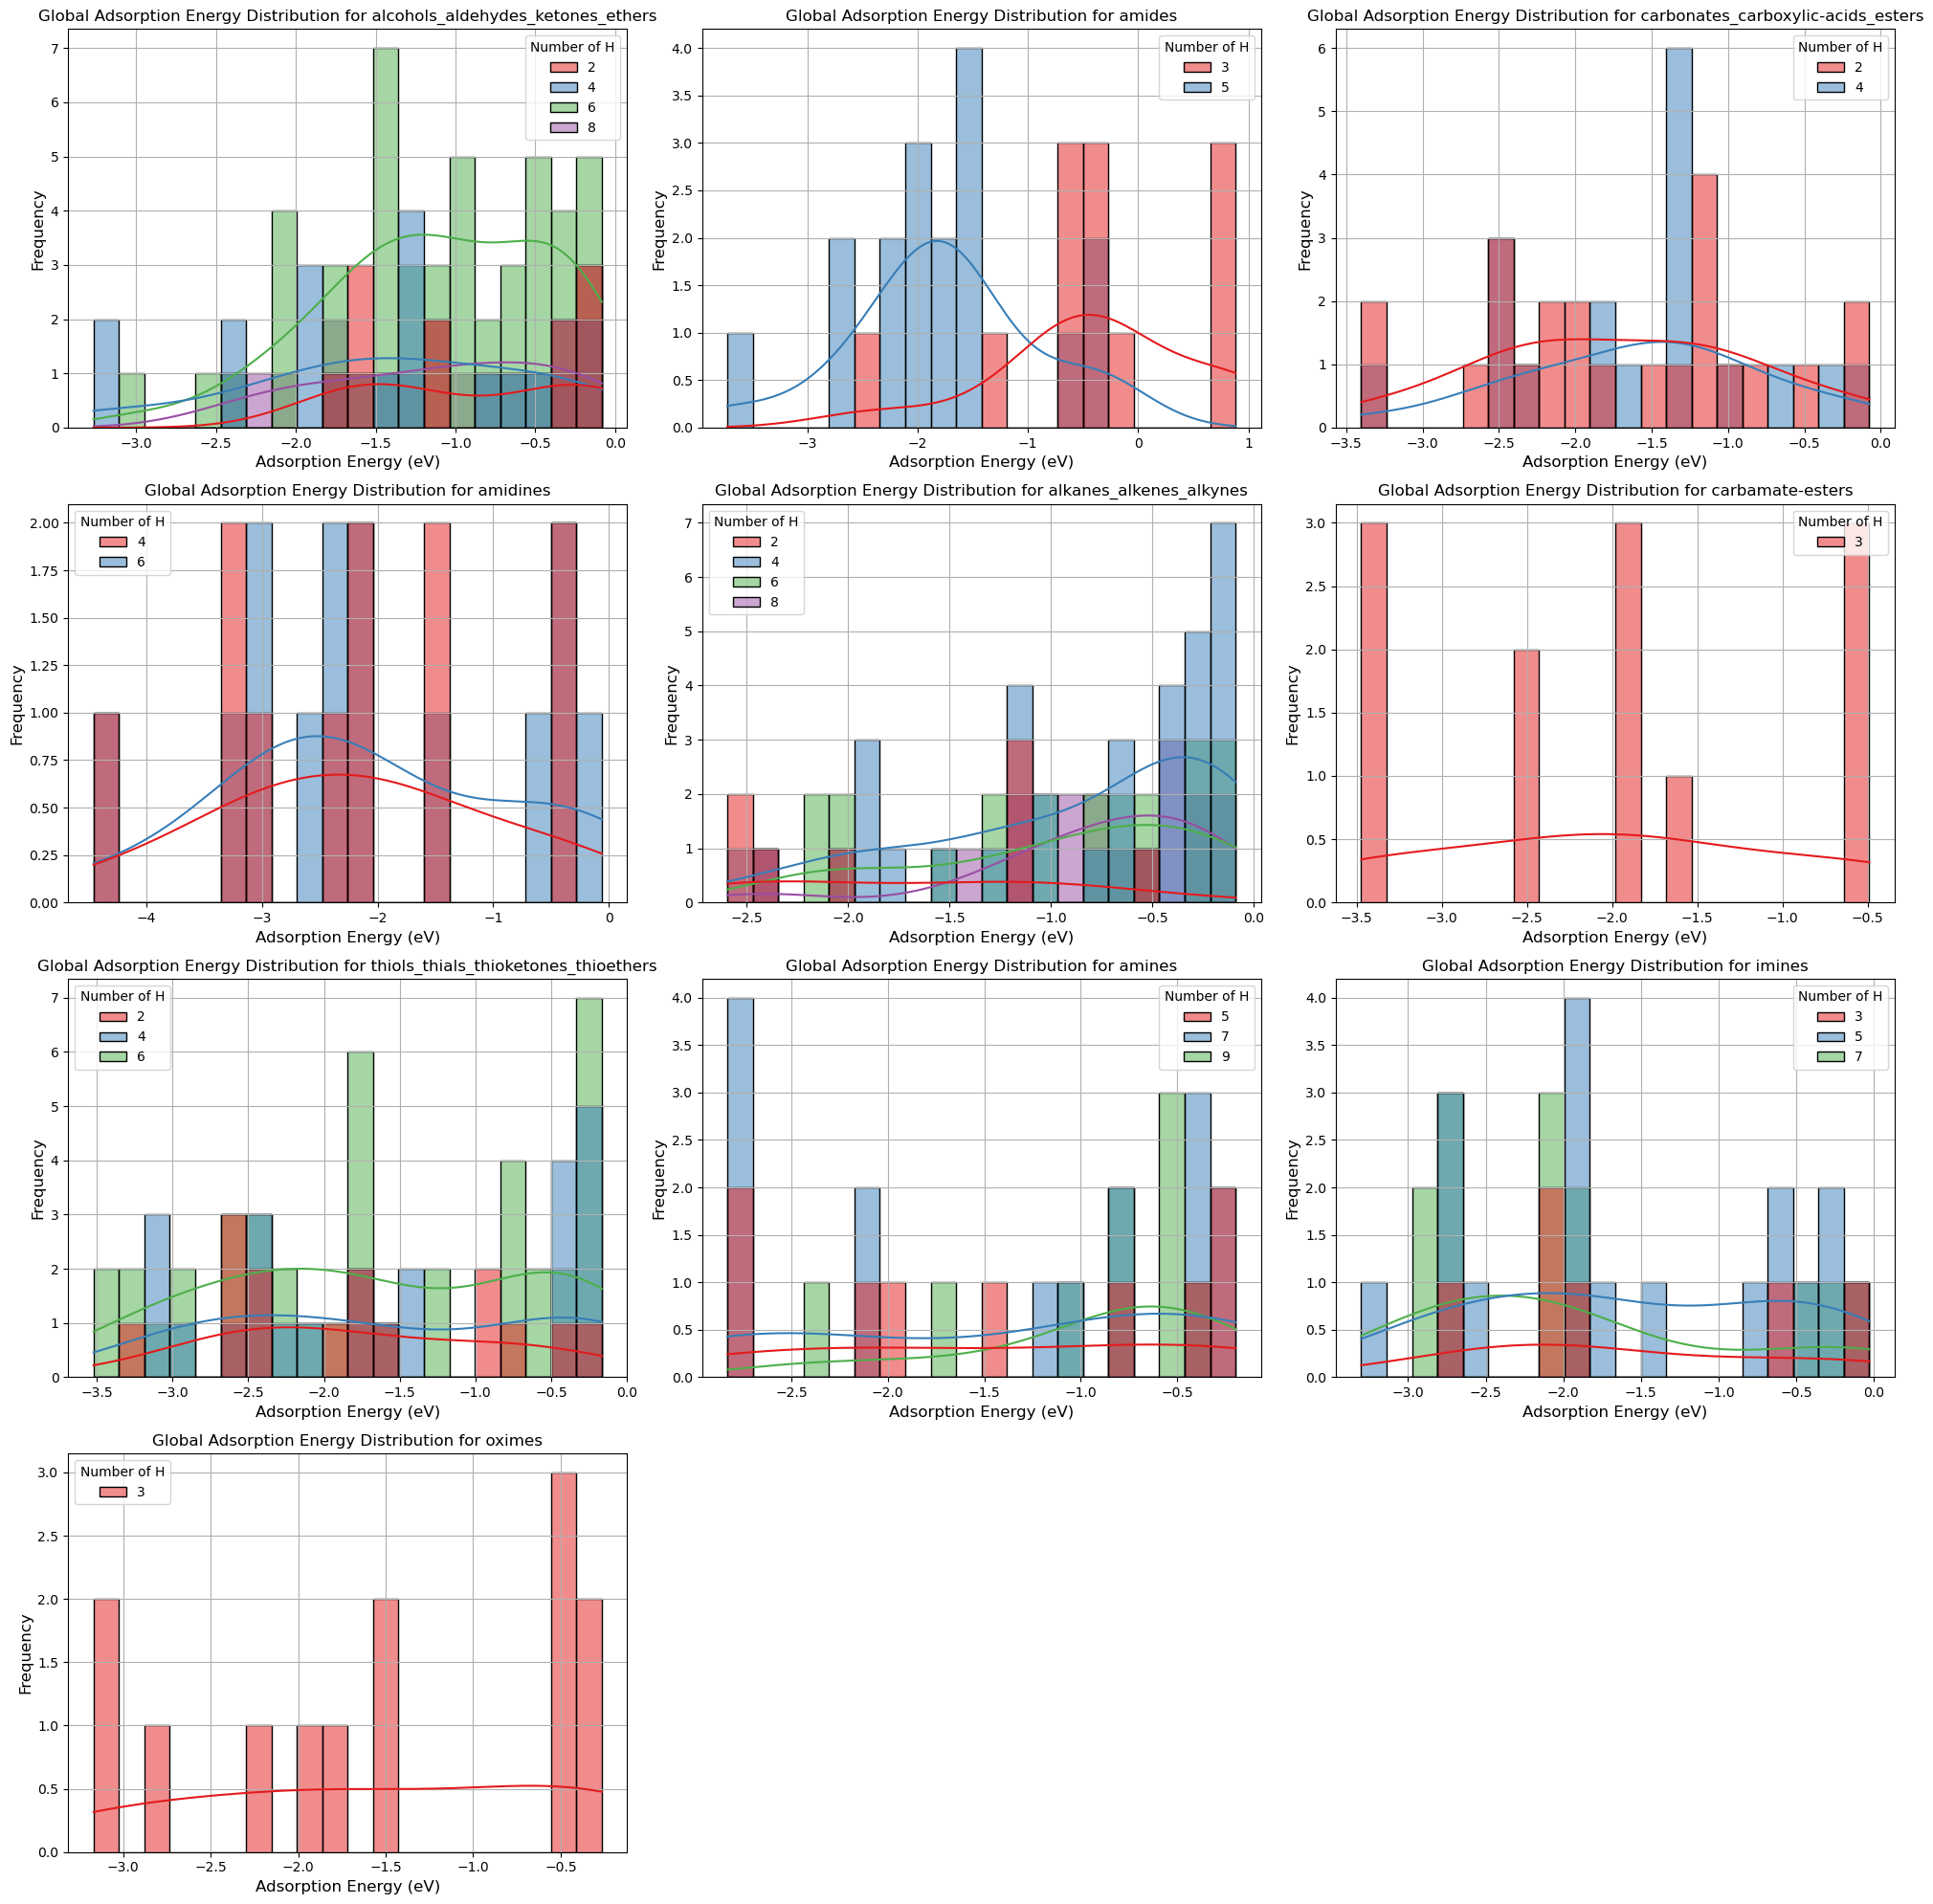

In [124]:

molecule_groups = df_filtered['Molecule Group'].unique()

num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_filtered[df_filtered['Molecule Group'] == group]
    
    sns.histplot(group_data, x='Adsorption Energy', hue='Number of H', bins=20, kde=True, ax=axes[i], palette="Set1")
    
    # Set the title and labels
    axes[i].set_title(f"Global Adsorption Energy Distribution for {group}", fontsize=12)
    axes[i].set_xlabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
fig.tight_layout()

# Show the plot
plt.show()

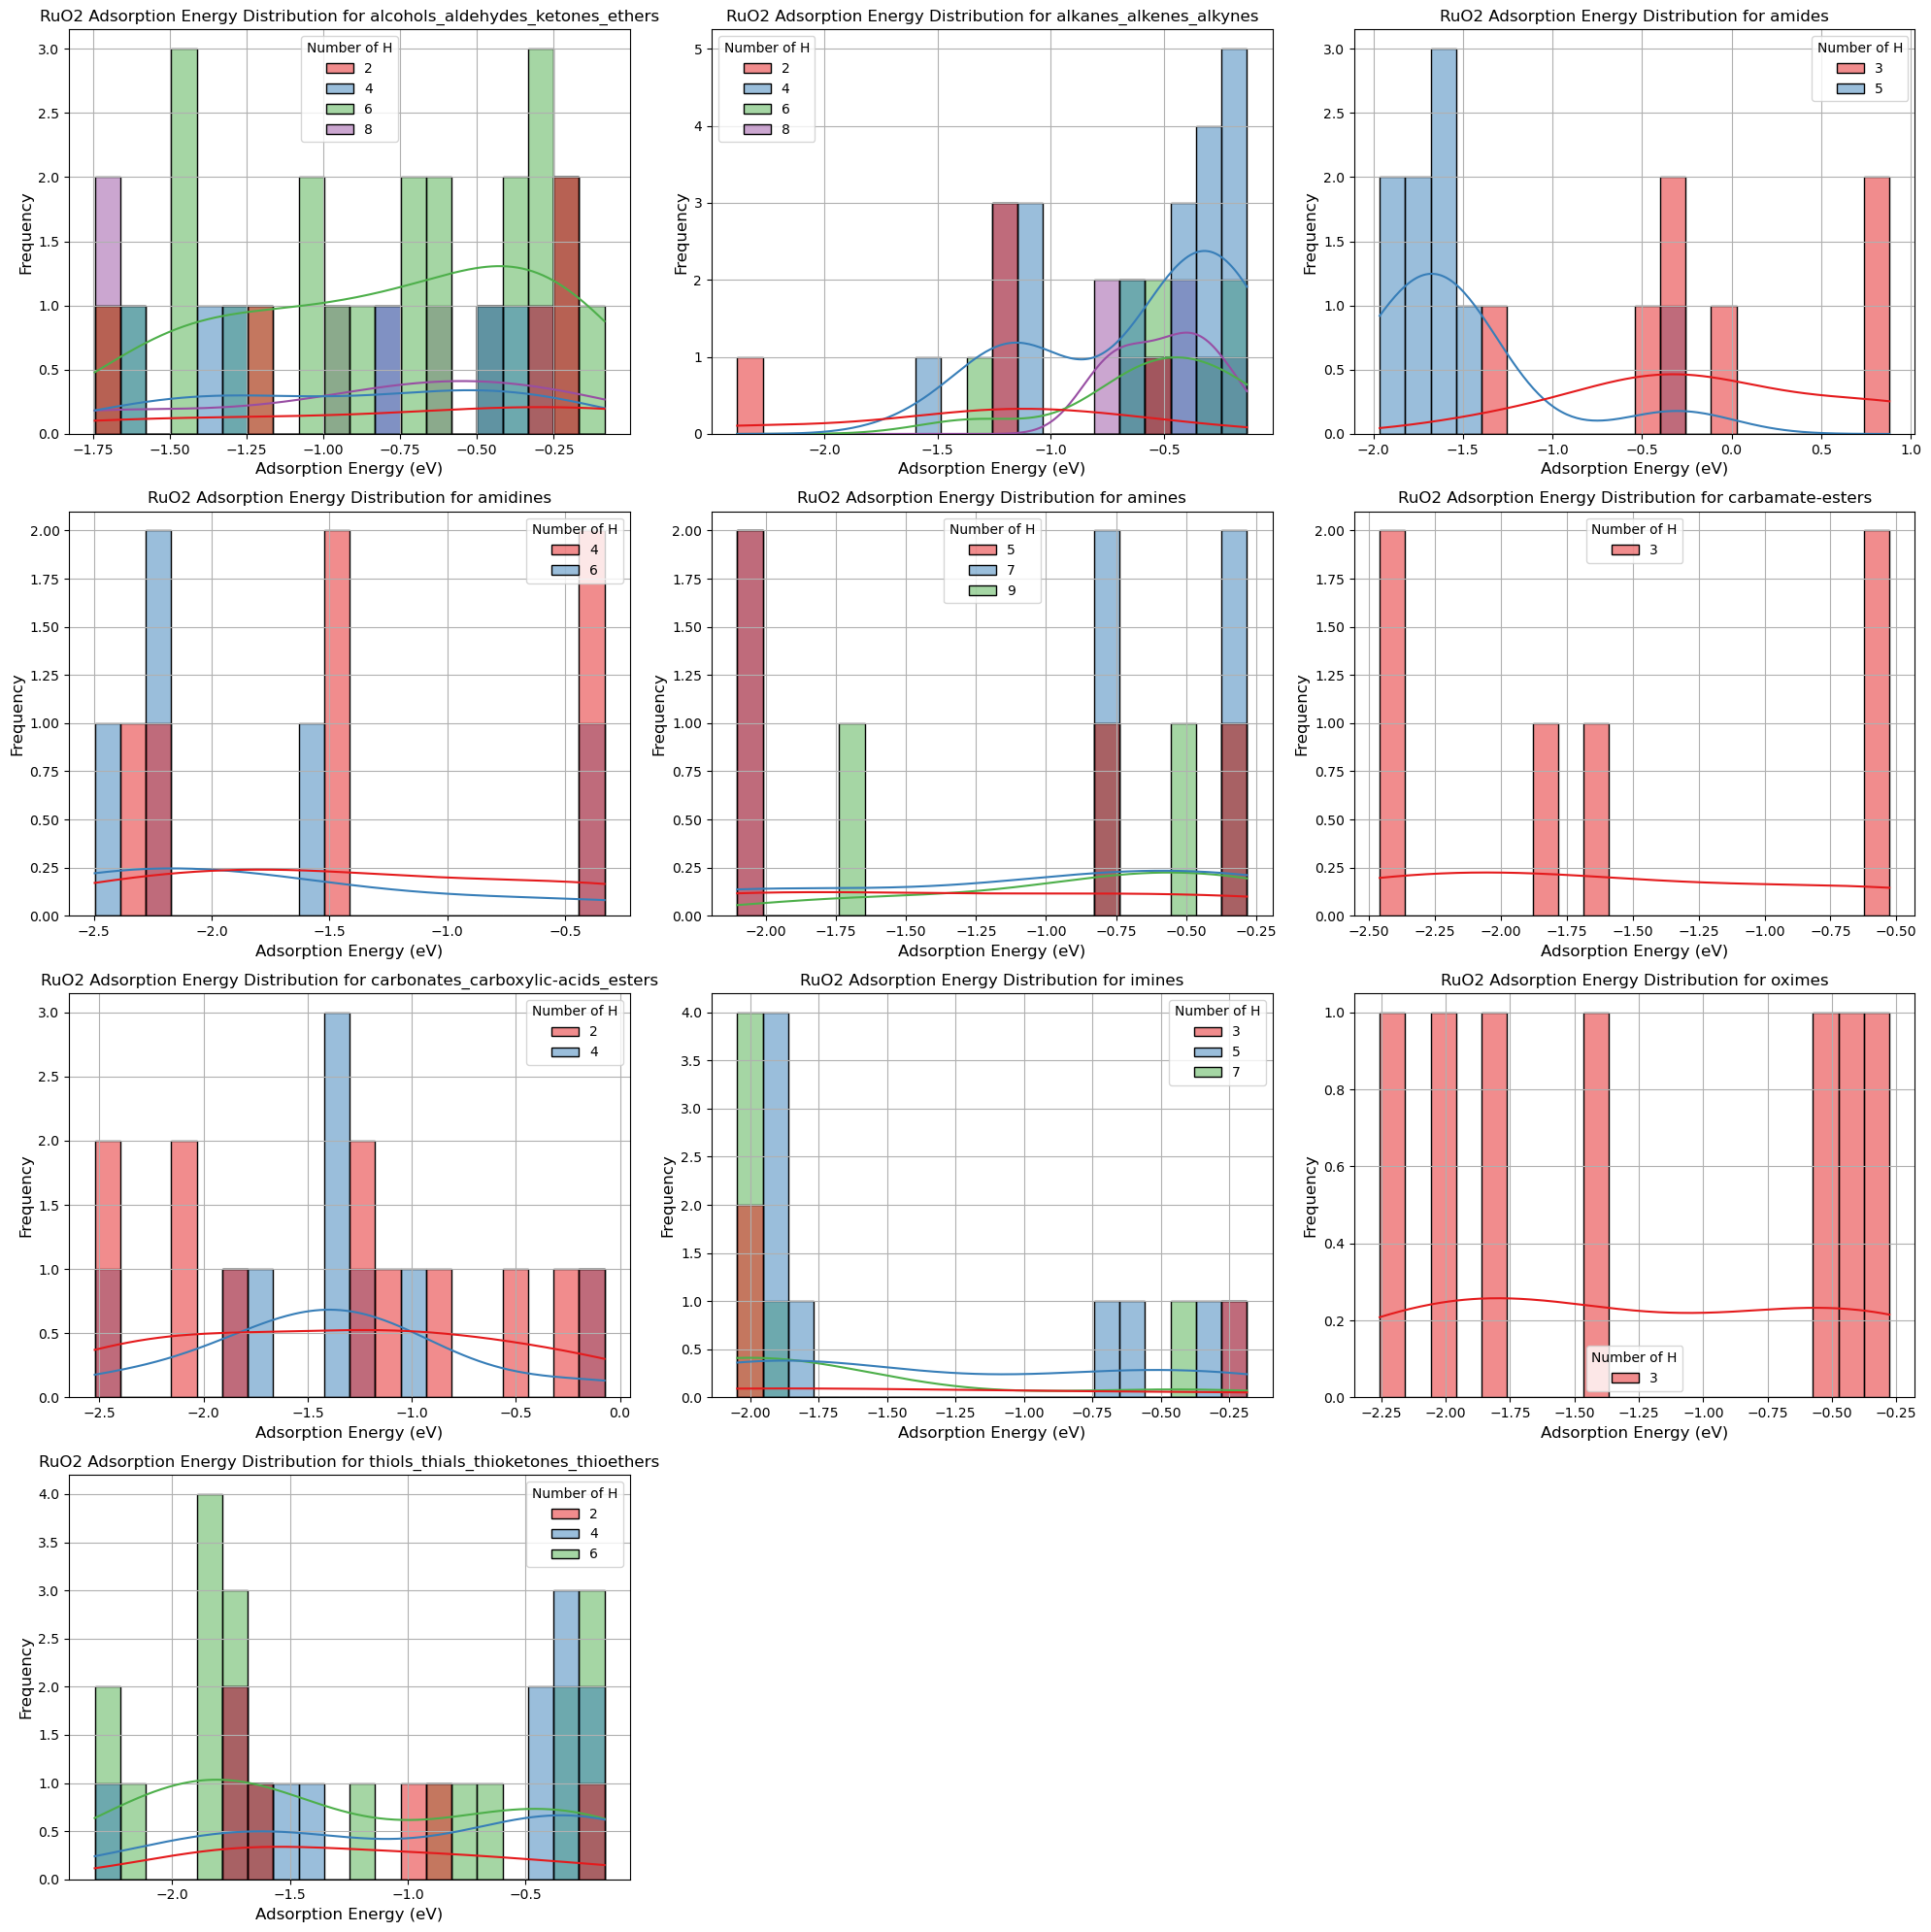

In [125]:

molecule_groups = df_RuO2['Molecule Group'].unique()

num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_RuO2[df_RuO2['Molecule Group'] == group]
    
    sns.histplot(group_data, x='Adsorption Energy', hue='Number of H', bins=20, kde=True, ax=axes[i], palette="Set1")
    
    # Set the title and labels
    axes[i].set_title(f"RuO2 Adsorption Energy Distribution for {group}", fontsize=12)
    axes[i].set_xlabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
fig.tight_layout()

# Show the plot
plt.show()

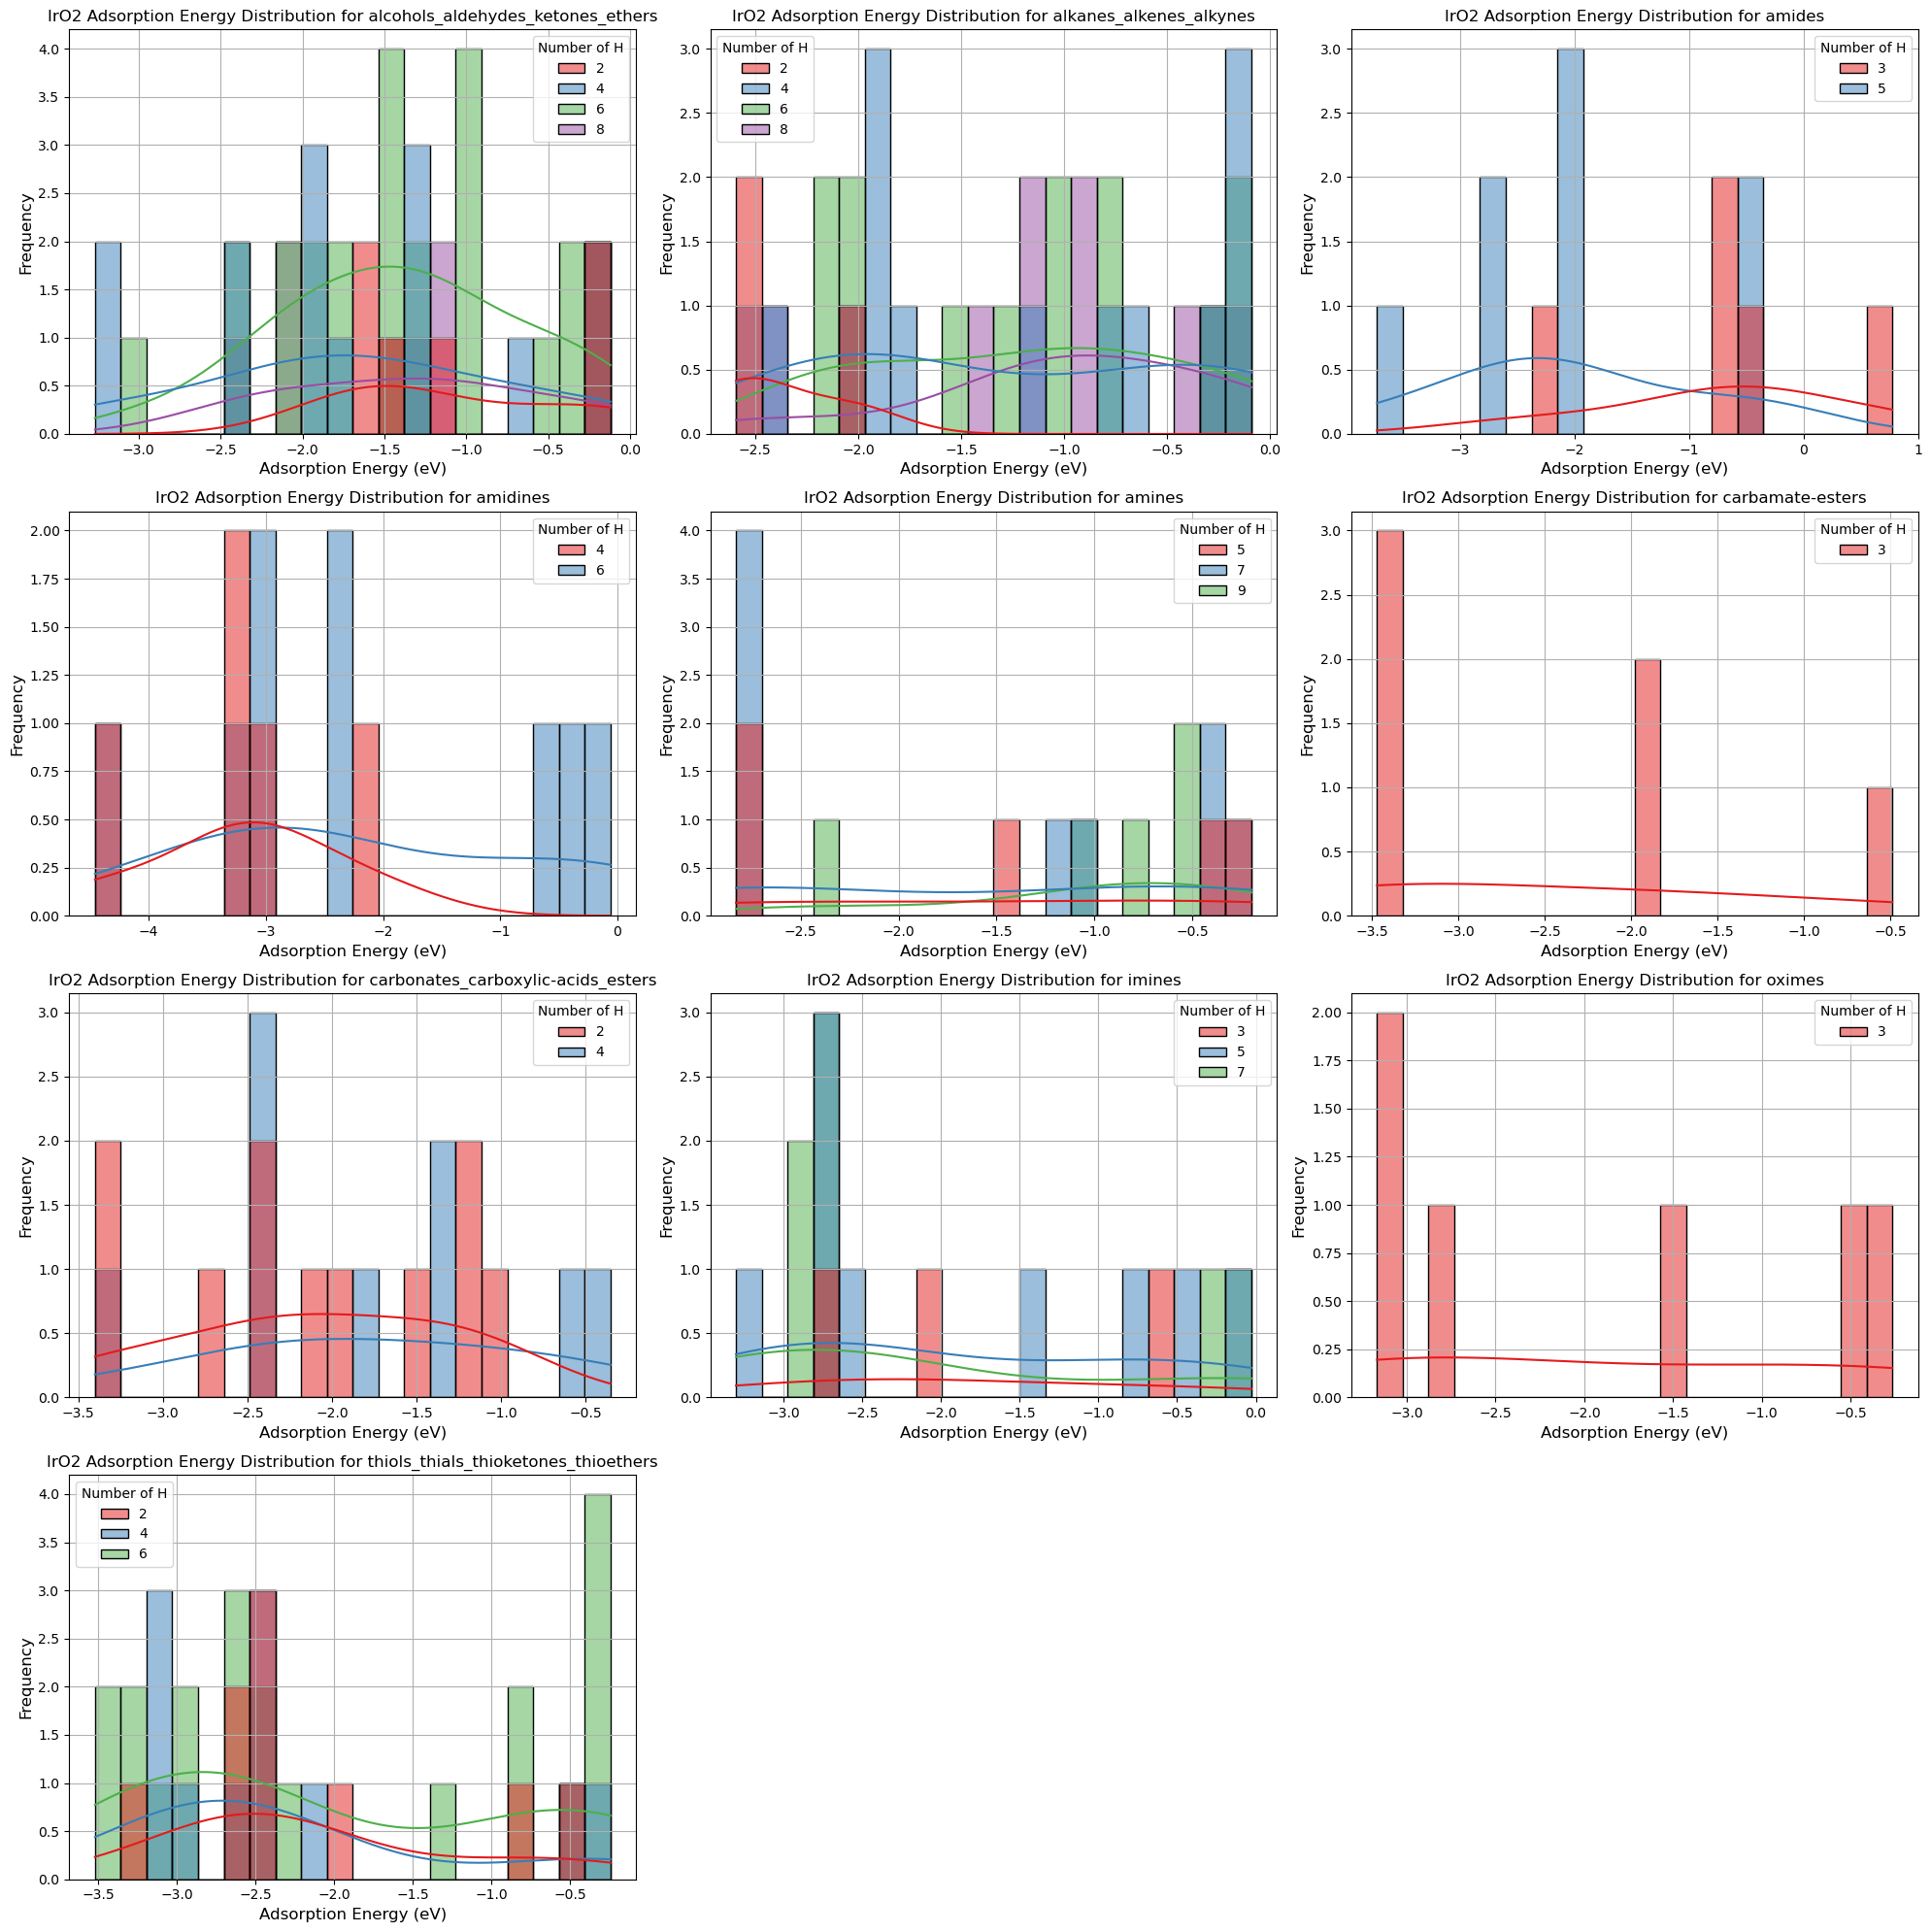

In [126]:

molecule_groups = df_IrO2['Molecule Group'].unique()

num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_IrO2[df_IrO2['Molecule Group'] == group]
    
    sns.histplot(group_data, x='Adsorption Energy', hue='Number of H', bins=20, kde=True, ax=axes[i], palette="Set1")
    
    # Set the title and labels
    axes[i].set_title(f"IrO2 Adsorption Energy Distribution for {group}", fontsize=12)
    axes[i].set_xlabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
fig.tight_layout()

# Show the plot
plt.show()

# Initial Site insights

In [140]:
site_counts = df_filtered['Initial Site'].value_counts()
print(site_counts)

Initial Site
Metal            123
Oxygen            93
Metal Bridge      84
Hole              76
Oxygen Bridge     73
Name: count, dtype: int64


/tmp/ipykernel_1227005/1584893234.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_filtered, x = "Adsorption Energy", bins=30, kde=True, palette="Set1", ax=axes[0])


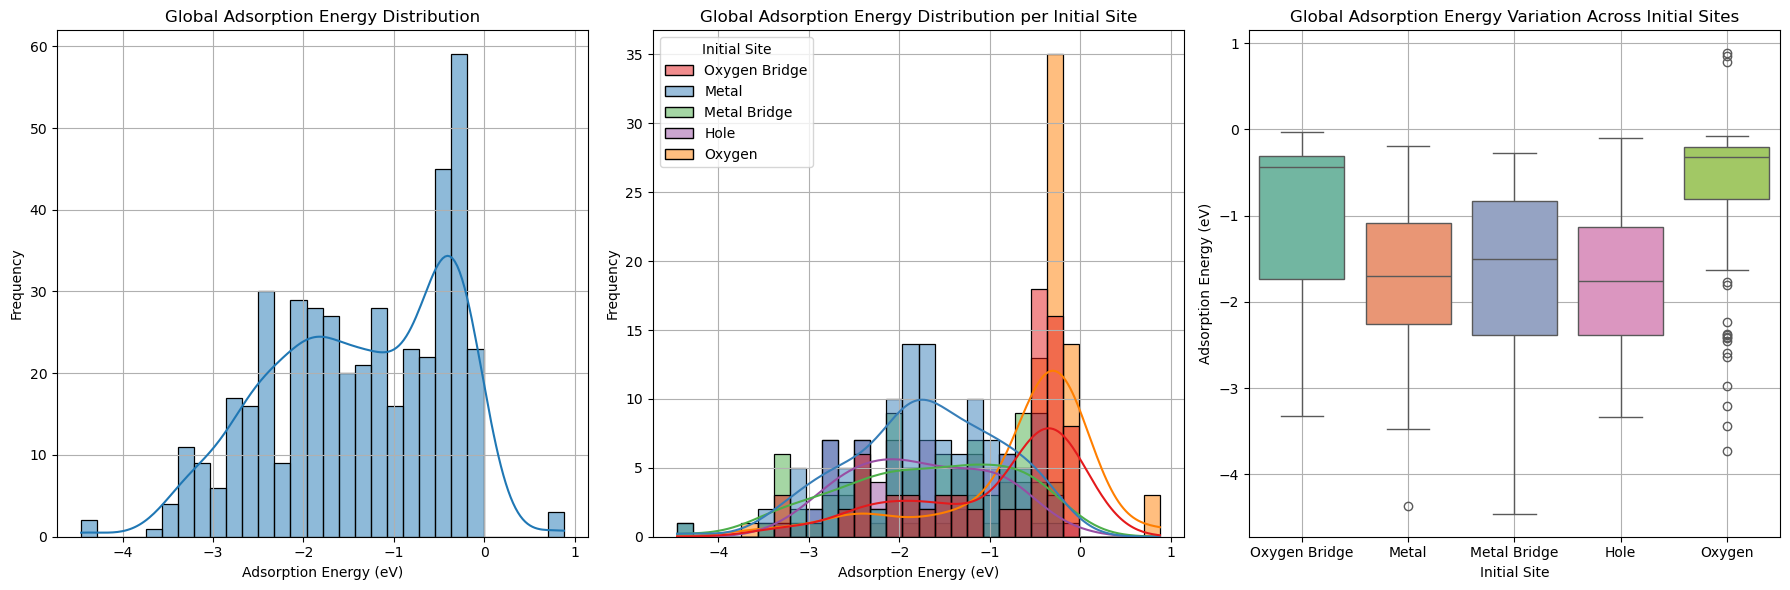

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# First plot
sns.histplot(df_filtered, x = "Adsorption Energy", bins=30, kde=True, palette="Set1", ax=axes[0])
axes[0].set_title("Global Adsorption Energy Distribution")
axes[0].set_xlabel("Adsorption Energy (eV)")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Second plot
sns.histplot(df_filtered, x = "Adsorption Energy", hue = 'Initial Site' , bins=30, kde=True, palette="Set1", ax=axes[1])
axes[1].set_title("Global Adsorption Energy Distribution per Initial Site")
axes[1].set_xlabel("Adsorption Energy (eV)")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)

# Third plot
sns.boxplot(x="Initial Site", y="Adsorption Energy", data=df_filtered, hue = "Initial Site", palette="Set2", legend=False, ax=axes[2])
axes[2].set_title("Global Adsorption Energy Variation Across Initial Sites")
axes[2].set_ylabel("Adsorption Energy (eV)")
axes[2].set_xlabel("Initial Site")
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

plt.show()

##### The graphs show that the double peak is due to the adsorption site of the molecule. However, there is still some slight bimodality observed. This is likely due to some molecules moving to a different final site. This movement is mainly evident in the boxplot. Here the Oxygen site displays a significant number of outliers, indicating that molecules do not always remain on their initial adsorption site.

/tmp/ipykernel_1227005/1046577438.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_RuO2, x = "Adsorption Energy", bins=30, kde=True, palette="Set1", ax=axes[0])


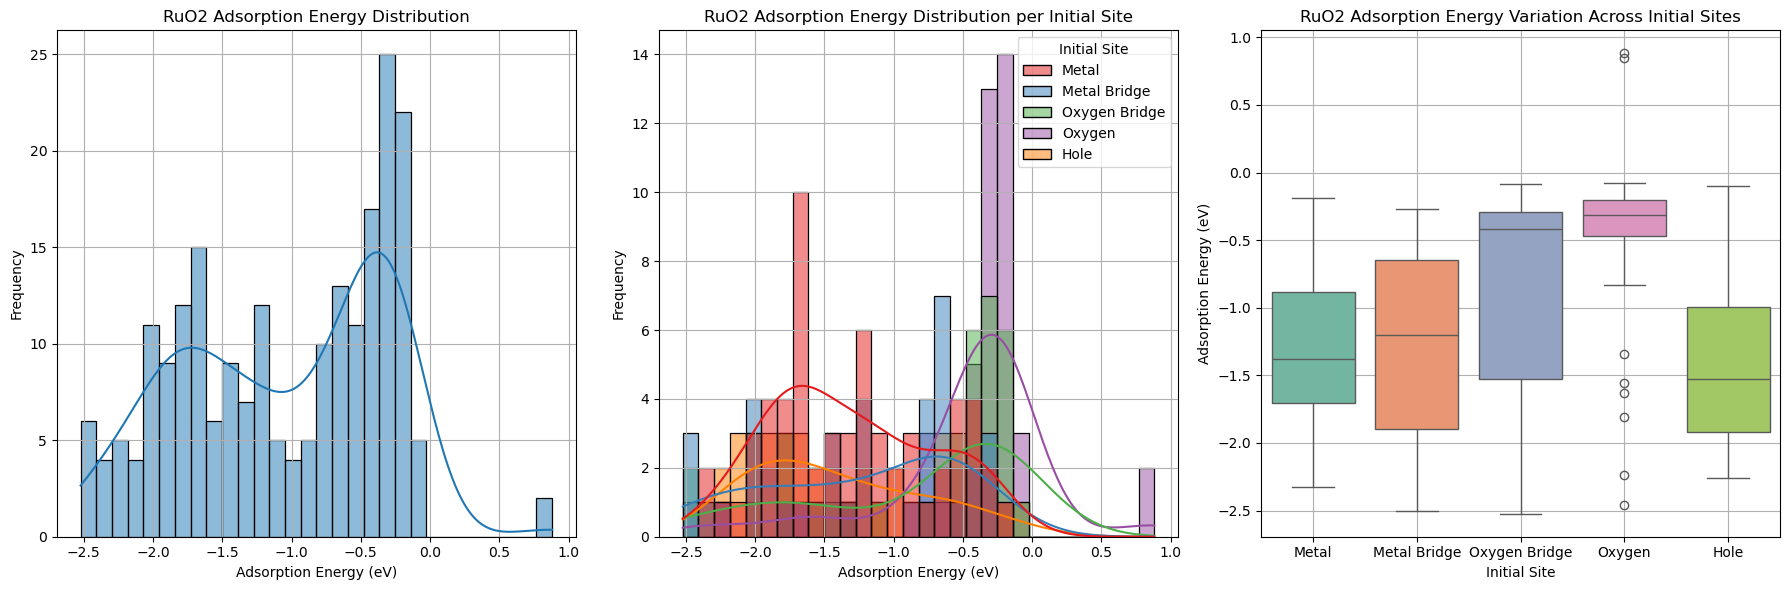

In [141]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# First plot
sns.histplot(df_RuO2, x = "Adsorption Energy", bins=30, kde=True, palette="Set1", ax=axes[0])
axes[0].set_title("RuO2 Adsorption Energy Distribution")
axes[0].set_xlabel("Adsorption Energy (eV)")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Second plot
sns.histplot(df_RuO2, x = "Adsorption Energy", hue = 'Initial Site' , bins=30, kde=True, palette="Set1", ax=axes[1])
axes[1].set_title("RuO2 Adsorption Energy Distribution per Initial Site")
axes[1].set_xlabel("Adsorption Energy (eV)")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)

# Third plot
sns.boxplot(x="Initial Site", y="Adsorption Energy", data=df_RuO2, hue = "Initial Site", palette="Set2", legend=False, ax=axes[2])
axes[2].set_title("RuO2 Adsorption Energy Variation Across Initial Sites")
axes[2].set_ylabel("Adsorption Energy (eV)")
axes[2].set_xlabel("Initial Site")
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

plt.show()

/tmp/ipykernel_1227005/2306895641.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_IrO2, x = "Adsorption Energy", bins=30, kde=True, palette="Set1", ax=axes[0])


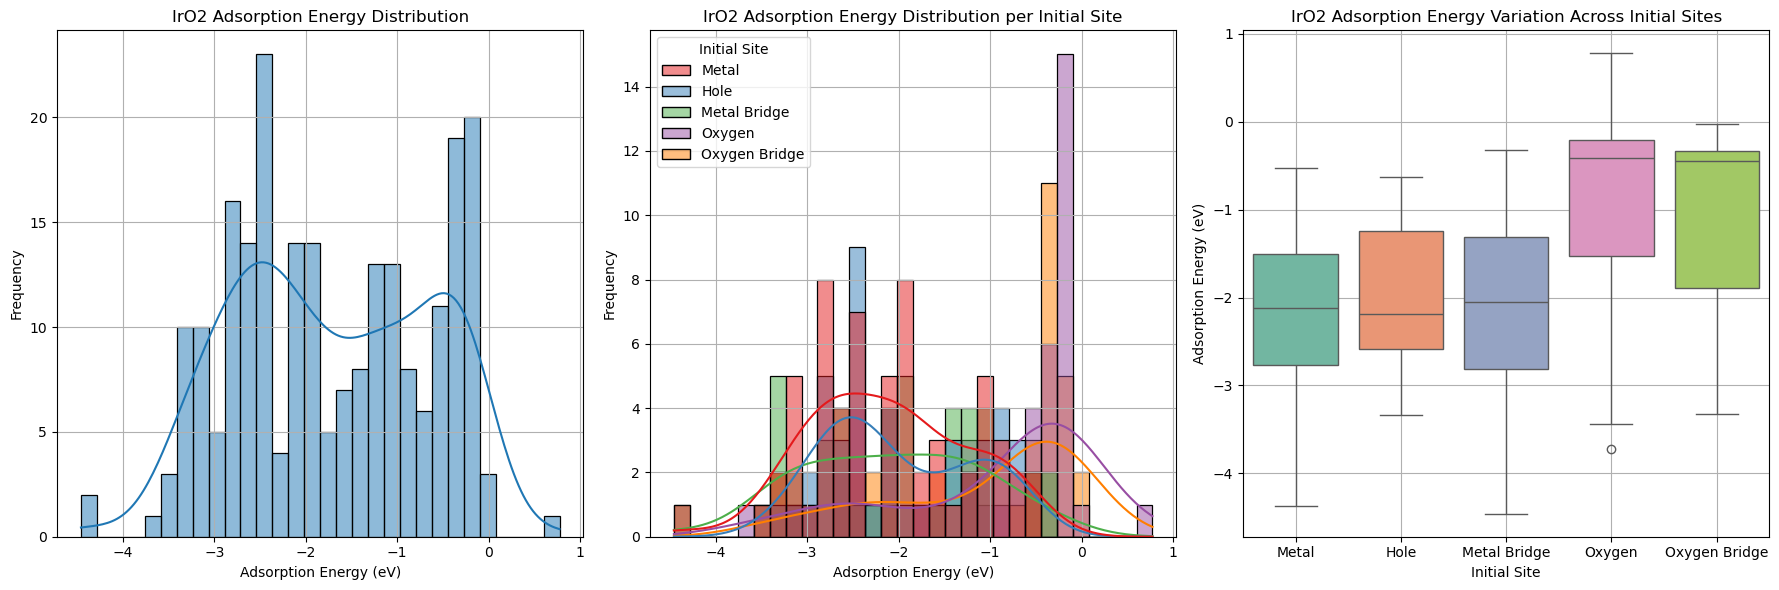

In [123]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# First plot
sns.histplot(df_IrO2, x = "Adsorption Energy", bins=30, kde=True, palette="Set1", ax=axes[0])
axes[0].set_title("IrO2 Adsorption Energy Distribution")
axes[0].set_xlabel("Adsorption Energy (eV)")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Second plot
sns.histplot(df_IrO2, x = "Adsorption Energy", hue = 'Initial Site' , bins=30, kde=True, palette="Set1", ax=axes[1])
axes[1].set_title("IrO2 Adsorption Energy Distribution per Initial Site")
axes[1].set_xlabel("Adsorption Energy (eV)")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)

# Third plot
sns.boxplot(x="Initial Site", y="Adsorption Energy", data=df_IrO2, hue = "Initial Site", palette="Set2", legend=False, ax=axes[2])
axes[2].set_title("IrO2 Adsorption Energy Variation Across Initial Sites")
axes[2].set_ylabel("Adsorption Energy (eV)")
axes[2].set_xlabel("Initial Site")
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

plt.show()